In [1]:
#TO remove :
import os
directory = os.getcwd()
print(directory)

C:\Users\s1114237\OneDrive - Syngenta\Formations\Training\EPFL extension school\Machine_Learning_EPFL-extension-school\Course#2 Data Analysis


In [2]:
#os.chdir("Machine_Learning_EPFL-extension-school\Course#2 Data Analysis")
#directory = os.getcwd()
print(directory)

C:\Users\s1114237\OneDrive - Syngenta\Formations\Training\EPFL extension school\Machine_Learning_EPFL-extension-school\Course#2 Data Analysis


# Working with time-series data
## Pandas data structures for time series data

In this unit we introduce the fundamental data structures in pandas for working with time series data. In the first part, we introduce three data types followed by their associated indexes. In the second part, we discuss frequencies and offsets for time series data.

### The Timestamp object and its DatetimeIndex object

Pandas’ Timestamp object provides an easy to use tool for dealing with dates and times that is also very efficient. Its efficiency is due to the fact that it takes advantage of the storage and vectorized interface of the NumPy datetime64 dtype. This data type encodes dates as 64-bit integers allowing them to be represented in a compact way.

Let’s now look at some examples. We can create a Timestamp object in pandas using the pd.to_datetime() function and specifying a minimum of three parameters representing the year, month and day. There is a lot of flexibility as to how we can provide these parameters. Try out each of the examples below

In [3]:
import pandas as pd
import numpy as np

pd.to_datetime("13th of February, 2009")

Timestamp('2009-02-13 00:00:00')

In [4]:
pd.to_datetime("02-13-2009")

Timestamp('2009-02-13 00:00:00')

In [5]:
pd.to_datetime("Feb 13, 2009")

Timestamp('2009-02-13 00:00:00')

As you can see there are many different ways to define the same date. We can choose to specify also a time together with our date as follows

In [6]:
pd.to_datetime("Feb 13, 2009 14:20:00")

Timestamp('2009-02-13 14:20:00')

If we instead provide only a time then the current local date will be assigned

In [7]:
pd.to_datetime("13:00")

Timestamp('2023-11-25 13:00:00')

We can even retrieve the current date and time by passing the keyword 'now' as follows

In [8]:
pd.to_datetime("now")

Timestamp('2023-11-25 09:25:36.040461')

The Timestamp object has several useful attributes. We can, for example, retrieve the day of the week using

In [9]:
pd.to_datetime("Feb 13, 2009 14:20:00").day_name()

'Friday'

***Note :*** What happens when we store a sequence of Timestamp objects in a Series? Well, pandas has a special index object for us called Datetimeindex. This is essentially where the pandas time series tools become really useful since it allows to index data by timestamps.

Creating DatetimeIndex() objects is very simple: we just pass a series of dates to the pd.to_dateTime() function. Let’s look at an example.

In [10]:
dates = pd.to_datetime(
    [pd.Timestamp(2015, 8, 5), pd.Timestamp(2015, 8, 6), pd.Timestamp(2015, 8, 7)]
)
dates

DatetimeIndex(['2015-08-05', '2015-08-06', '2015-08-07'], dtype='datetime64[ns]', freq=None)

Here again you can retrieve date and time information, for example, the day or the month using

In [11]:
dates.day

Int64Index([5, 6, 7], dtype='int64')

In [12]:
dates.month

Int64Index([8, 8, 8], dtype='int64')

### The Timedelta object and its TimedeltaIndex object
The Timedelta object is meant to capture the difference in time between two Timestamp objects. Whenever we subtract one Timestamp object from another what we get back is a Timedelta object. Try out the following example

In [13]:
date1 = pd.Timestamp("2018-03-03")
date2 = pd.Timestamp("1984-03-03")
date1 - date2

Timedelta('12418 days 00:00:00')

We can also create a Timedelta object using pd.Timedelta as follows

In [14]:
pd.Timedelta(days=54, hours=3)

Timedelta('54 days 03:00:00')

If we add a Timedelta to a Timestamp we get another Timestamp:

In [15]:
date1 + pd.Timedelta(days=54, hours=3)

Timestamp('2018-04-26 03:00:00')

***Note :*** Just like subtracting two Timestamp objects results in a Timedelta object, subtracting two DatetimeIndex objects results in a TimdeltaIndex object.

To create TimdeltaIndex() object try the following example

In [16]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '2 days'], dtype='timedelta64[ns]', freq=None)

Here we subtracted the first date from each of the dates and the corresponding time durations are now returned as a TimedeltaIndex object.

### The Period object and its PeriodIndex object
The last of the three data structures for time series data is the Period object which encodes a fixed frequency interval. The purpose of this object is to allow us to specify a duration based on a frequency such as daily, weekly or annually. Pandas then provides a specific start and end Timestamp to represent this interval of time.

As an example the following line of code creates a period representing one month

In [17]:
jan2015 = pd.Period("2015-01")
jan2015

Period('2015-01', 'M')

Notice that pandas added a parameter 'M' which indicates that this Period object has a frequency of one month. This is the default setting. We can specify a different frequency when creating a Period object using the freq parameter as follows

In [18]:
pd.Period("2015-01", freq="D")

Period('2015-01-01', 'D')

We can check the start and end times using the following attributes

In [19]:
jan2015.start_time

Timestamp('2015-01-01 00:00:00')

In [20]:
jan2015.end_time

Timestamp('2015-01-31 23:59:59.999999999')

We can also change the frequency of a period using the asfreq() function and providing a new frequency

In [21]:
period = pd.Period("2015-01", freq="H")
period.asfreq("D")

Period('2015-01-01', 'D')

We can also convert aPeriod object into a Timestamp object

In [22]:
period = pd.Period("2015-01", freq="H")
period.to_timestamp()

Timestamp('2015-01-01 00:00:00')

Note that this takes the start time of the period. Conversely, we can go from a Timestamp to a Period as long as we provide a frequency

In [23]:
pd.Timestamp("2015-01-01 00:00:00").to_period("M")

Period('2015-01', 'M')

***Note :*** A Series of Period objects can also be combined as a PeriodIndex object. One way of creating a PeriodIndex object is by converting any DatetimeIndex object using the pd.to_period() function and specifying the desired frequency.

Let’s give this a try

In [24]:
print(dates.to_period("D"))
print(dates.to_period("D")[0].start_time)
print(dates.to_period("D")[0].end_time)

PeriodIndex(['2015-08-05', '2015-08-06', '2015-08-07'], dtype='period[D]')
2015-08-05 00:00:00
2015-08-05 23:59:59.999999999


### Creating series and dataframes using the three data structures
So far we have discussed three data structures. Now we can use them and construct a Series (or a DataFrame) object by just providing the necessary values and specifying our choice of index. Try out each of the examples below



In [25]:
ts1 = pd.Series(np.arange(3), dates)
print("ts1 :") 
print(ts1)

ts2 = pd.Series(np.arange(3), dates.to_period("D"))
print("ts2 :") 
print(ts2)

ts3 = pd.Series(np.arange(3), dates - dates[0])
print("ts3 :") 
print(ts3)

ts1 :
2015-08-05    0
2015-08-06    1
2015-08-07    2
dtype: int32
ts2 :
2015-08-05    0
2015-08-06    1
2015-08-07    2
Freq: D, dtype: int32
ts3 :
0 days    0
1 days    1
2 days    2
dtype: int32


You can check the specific index of all of these Series

In [26]:
print(ts1.index)
print(ts2.index)
print(ts3.index)

DatetimeIndex(['2015-08-05', '2015-08-06', '2015-08-07'], dtype='datetime64[ns]', freq=None)
PeriodIndex(['2015-08-05', '2015-08-06', '2015-08-07'], dtype='period[D]')
TimedeltaIndex(['0 days', '1 days', '2 days'], dtype='timedelta64[ns]', freq=None)


The big advantage of having data stored with these special type of time indices is that we can then access them by timestamps, periods, and duration respectively. We can use all of the usual Series indexing commands we have seen before. Also, a very useful trick to keep in mind is that we can slice a DatetimeIndex object by just specifying a year, or a month. It will then return all entries that correspond to the given year or month.

In [27]:
print('ts1["2015.08.05"] :')
print(ts1["2015.08.05"])
print('ts1["august 5, 2015"]')
print(ts1["august 5, 2015"])
print('ts1[1:3]')
print(ts1[1:3])
print('ts1["2015-08-06 ":"2015-08-07 "]')
print(ts1["2015-08-06 ":"2015-08-07 "])
print('ts1["2015"]')
print(ts1["2015"])

ts1["2015.08.05"] :
0
ts1["august 5, 2015"]
0
ts1[1:3]
2015-08-06    1
2015-08-07    2
dtype: int32
ts1["2015-08-06 ":"2015-08-07 "]
2015-08-06    1
2015-08-07    2
dtype: int32
ts1["2015"]
2015-08-05    0
2015-08-06    1
2015-08-07    2
dtype: int32


It is often the case that we want to create a special index object consisting of a regular sequence defined by a specific range. In order to facilitate this pandas offers us to following three functions

- pd.date_range() for timestamps
- pd.timdelta_range() for time deltas
- pd.period_range() for periods

These functions are similar to NumPy’s np.arange() which if you recall takes a start point, an endpoint, and an optional frequency and creates a sequence of evenly spaced numbers.

For the pd.date_range() function we can specify either a start and end date as follows

In [28]:
pd.date_range("2018-01-01", "2018-01-05")

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05'],
              dtype='datetime64[ns]', freq='D')

or a start time and the number of periods

In [29]:
pd.date_range("2018-01-01", periods=5)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05'],
              dtype='datetime64[ns]', freq='D')

We can see that both commands created a DatetimeIndex object that contains five Timestamp objects. The default frequency of the dates was one day. We can specify a different frequency by adding in the freq parameter.

In [30]:
pd.date_range("01-01-2018", periods=5, freq="H")

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00'],
              dtype='datetime64[ns]', freq='H')

To create regular sequences of Timedelta or Period objects we can use the similar functions pd.timedelta_range() and pd.period_range().

In [31]:
pd.timedelta_range(0, periods=5, freq="H")

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [32]:
pd.period_range("2018-01", periods=3, freq="M")

PeriodIndex(['2018-01', '2018-02', '2018-03'], dtype='period[M]')

### Frequencies and offsets
We already saw some options of frequency such as M for month, D for day and H for hour. In fact pandas a whole list of frequency codes available to us. Below we summarize the main ones

- H Hour
- D Day
- W Week
- M Month
- Q Quarter
- A Year

As you can see there is quite a bit of choice, so it’s important to be aware of possibilities available to you. Now dealing with frequencies and data offsets is a fundamental part of working with time series. In pandas, frequencies are represented using date offsets. For this there is a special object called DateOffset. This object represents a regular frequency increment. Let’s try an example

In [33]:
pd.DateOffset(days=1)

<DateOffset: days=1>

So what can we actually use these for? Well we can add or subtract them from a Timestamp

In [34]:
pd.Timestamp("2010.01.01") + pd.DateOffset(days=1)

Timestamp('2010-01-02 00:00:00')

But more importantly, pandas has specific types of offsets available to use. Below we list some of the main ones, but for a full list you can consult the pandas documentation for DateOffset Objects

- BDay Business day
- Week One week, optionally anchored on a day of the week
- MonthEnd
- YearEnd

To use these we must first include the following statement in our notebook

In [35]:
from pandas.tseries.offsets import *

So an equivalent way to define the business day offset we saw above would be :

In [36]:
pd.date_range("2010-07-07", periods=5, freq=BDay())

DatetimeIndex(['2010-07-07', '2010-07-08', '2010-07-09', '2010-07-12',
               '2010-07-13'],
              dtype='datetime64[ns]', freq='B')

Alternatively, we can also use anchored offsets. For example, if we are interested in specific days of the week then we can choose an anchored offset that computes all the dates corresponding to our chosen day of the week. Let’s try it with Friday. The code that we must use is W-FRI so we can write



In [37]:
pd.date_range("2010-07-07", periods=10, freq="W-FRI")

DatetimeIndex(['2010-07-09', '2010-07-16', '2010-07-23', '2010-07-30',
               '2010-08-06', '2010-08-13', '2010-08-20', '2010-08-27',
               '2010-09-03', '2010-09-10'],
              dtype='datetime64[ns]', freq='W-FRI')

This gives us the dates for 10 consecutive Fridays given our starting date.

Now that we are aware of the main objects and functions available to us it is time to actually work with some time series data. In the next unit we load a data set containing financial data.

### Summary
Let’s summarize what we’ve learned in this unit. Here are a few takeaways:

- We showed various examples of Timestamp, Timedelta and Period objects from pandas
- We showed their associated indexes i.e. DatetimeIndex, TimedeltaIndex and PeriodIndex
- We also showed multiple examples of frequencies and offsets used for time series data
In the following units in this subject we revisit this tools again and see how they can be used in time series analysis with real data.

## Shifting and computing first differences 

In this unit, we use financial time series from Yahoo and discuss how we can use pandas to shift the time series values backward and forward in time. Let’s start by taking a look at the data set.

### Getting the data
The data shows market information, from 1984 to 2020, for the share of JPMorgan Chase & Co., the largest bank holding company in the US, which is listed on the New York Stock Exchange. The data is stored in a CSV file called c2_financial_data.csv which can be downloaded from the resources tab of this unit. To import this data into a pandas dataframe we can use the read_csv() function.


In [38]:
import pandas as pd

# load the data
data = pd.read_csv("Ressources/c2_financial_data.csv", index_col="Date")

# create the time index
data.index = pd.to_datetime(data.index, format="%d.%m.%y")  # Convert the index


### A first look at the data
Let’s take a look at the top entries

In [39]:
# check the number of rows and columns
print(data.shape)

(9137, 6)


In [40]:
# check the few first rows
data.head()

Open  High   Low  Close  Adj Close     Volume
Date                                                     
1984-06-01  8.04  8.13  7.83   8.00       1.84   741000.0
1984-06-04  8.33  8.67  8.17   8.46       1.95   584700.0
1984-06-05  8.46  8.54  8.25   8.38       1.93  5370300.0
1984-06-06  8.38  8.54  8.38   8.54       1.97   365700.0
1984-06-07  8.54  8.58  8.46   8.54       1.97   904800.0

We can see that the data is indexed by date in the column Date, and there is one entry per business day. The next five columns show prices in the USD currency. The open and close prices are the prices at which the share trades upon the opening and closing of the exchange on a trading day, respectively. Also, the high and low show the highest and lowest traded prices at each trading day. Finally, the adjusted closing price is the closing price after accounting for any corporate actions. The volume in the last column shows the number of shares traded at each business day. Let’s focus on the closing prices.

In [41]:
prices = data["Close"]

We can check that the index is a DatetimeIndex

In [42]:
prices.index[:4]

DatetimeIndex(['1984-06-01', '1984-06-04', '1984-06-05', '1984-06-06'], dtype='datetime64[ns]', name='Date', freq=None)

We can access a slice of data corresponding to the first ten days of the year 2012

In [43]:
prices["2012-01-01":"2012-01-10"]

Date
2012-01-03    34.98
2012-01-04    34.95
2012-01-05    35.68
2012-01-06    35.36
2012-01-09    35.30
2012-01-10    36.05
Name: Close, dtype: float64

We can also visualize the trend of the prices over time

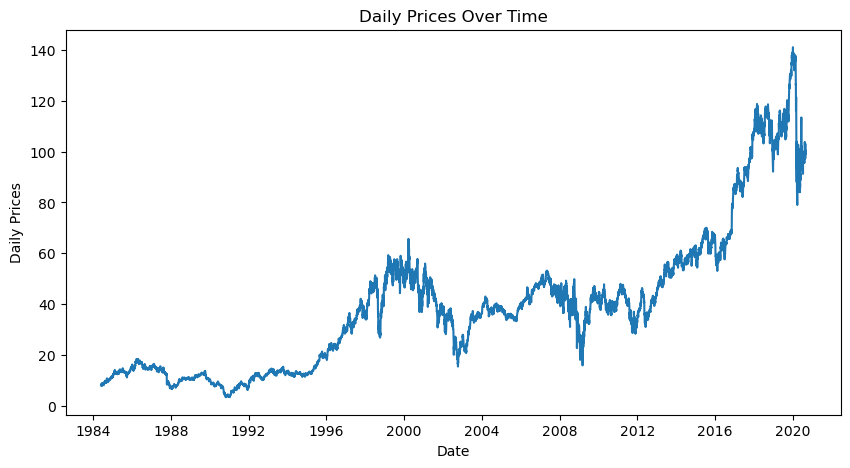

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set the size of the plot
fig = plt.subplots(figsize=(10, 5))

# Plot the trend of prices
plt.plot(prices)
plt.title("Daily Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Prices")
plt.show()

The plot shows clearly the boom and bust periods and in particular the major market crashes of 2000-2002, 2007-2008, and 2020. This is a common pattern that we often observe for the share prices of large financial institutions as well as the US stock market indexes. We note that the price is not moving around a certain level over time. Instead, it has an increasing trend over time. Moreover, the prices are varying more wildly over certain periods while being very smooth over other periods.

### Shifting entries
A common practice for time series data is to shift the values backward and forward in time. We can do this using the Pandas function shift() which will shift the values in a Series. Shifting has various applications when working with time series data. For instance, suppose that household electricity consumption of the previous month can predict the current month’s electricity consumption. Then, we need to create a new feature that represents past electricity consumption.

Let’s take a small range of prices and name it as Pt that stands for 
p
t
, the price at time t.

In [45]:
Pt = prices["2019-12-15":"2019-12-30"]
Pt

Date
2019-12-16    137.34
2019-12-17    138.18
2019-12-18    138.04
2019-12-19    137.35
2019-12-20    137.24
2019-12-23    137.20
2019-12-24    137.58
2019-12-26    139.04
2019-12-27    139.14
2019-12-30    138.63
Name: Close, dtype: float64

Now, let’s apply the shift() function on Pt

In [46]:
Pt.shift(periods=1)

Date
2019-12-16       NaN
2019-12-17    137.34
2019-12-18    138.18
2019-12-19    138.04
2019-12-20    137.35
2019-12-23    137.24
2019-12-24    137.20
2019-12-26    137.58
2019-12-27    139.04
2019-12-30    139.14
Name: Close, dtype: float64

By periods we can set the number of periods to shift the data. The default value is 1 and it can be positive or negative. As we can see, all prices were moved forward one period. So for each day, we now see the price from the previous day in our series. As a result, the last price (138.63) has been dropped, while the first price is now NaN.

***Note :***
A shift forward in time is called a lag, and a shift backward in time is called a lead.

Similarly, if we want to shift the entries backward, we can just pass a negative number to the function.

In [47]:
Pt.shift(-1)

Date
2019-12-16    138.18
2019-12-17    138.04
2019-12-18    137.35
2019-12-19    137.24
2019-12-20    137.20
2019-12-23    137.58
2019-12-24    139.04
2019-12-26    139.14
2019-12-27    138.63
2019-12-30       NaN
Name: Close, dtype: float64

This time the first value 137.34 was dropped and the last value has been filled with NaN since we shifted the values back one period.

Let’s now see them all together.

In [48]:
p = pd.concat([Pt.shift(-1), Pt, Pt.shift(1), Pt.shift(2)], axis=1)
p.columns = ["Pt+1", "Pt", "Pt-1", "Pt-2"]
print(p)

              Pt+1      Pt    Pt-1    Pt-2
Date                                      
2019-12-16  138.18  137.34     NaN     NaN
2019-12-17  138.04  138.18  137.34     NaN
2019-12-18  137.35  138.04  138.18  137.34
2019-12-19  137.24  137.35  138.04  138.18
2019-12-20  137.20  137.24  137.35  138.04
2019-12-23  137.58  137.20  137.24  137.35
2019-12-24  139.04  137.58  137.20  137.24
2019-12-26  139.14  139.04  137.58  137.20
2019-12-27  138.63  139.14  139.04  137.58
2019-12-30     NaN  138.63  139.14  139.04


Let’s interpret the lag and lead columns:

Column Pt-1: if we stand at day 2019-12-17 we would observe the price 137.34 which belongs to one day in the past, 2019-12-16 under Pt. That’s why a positive shift is shifting the data forward but its effect is looking backward in time.

Similarly for column Pt+1: if we stand at day 2019-12-16 we would observe the price 138.18 which belongs to one day in the future, 2019-12-17 under Pt. That’s why a negative shift is shifting the data backward but its effect is looking forward in time.

Let’s visualize the effect of the shifts on our time series using pandas.

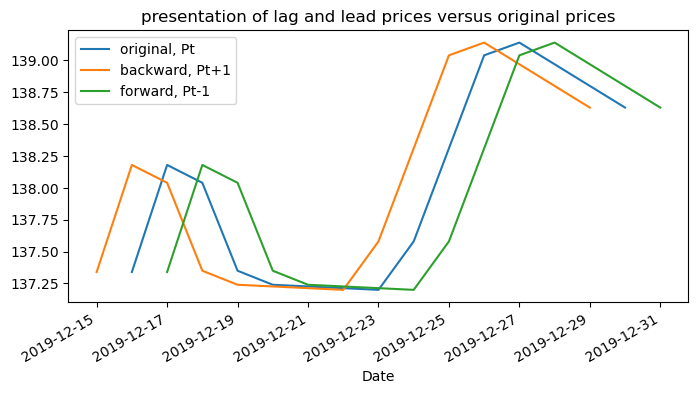

In [49]:
Pt.plot(figsize=(8, 3), label="original, Pt")
Pt.shift(-1, freq="D").plot(figsize=(8, 4), label="backward, Pt+1")
Pt.shift(1, freq="D").plot(figsize=(8, 4), label="forward, Pt-1")
plt.title("presentation of lag and lead prices versus original prices")
plt.legend()
plt.show()

The original prices have been moved one period to the left (orange) or to the right (green). The forward shifted series (green) appears to start a day later as it has NaN value on 2019-12-16 (in the appendix we explain how the input parameter freq can change the shifted prices when we use the shift() function).

***Note:*** The shift() function moves the data up or down regardless of the index. This can cause problems if the indices are not ordered chronologically.

#### Example - Analyzing the first difference
So how can we use shifting/lagging to help us analyze our data? A common practice is to calculate what is known as the first difference of the Series. This is obtained by subtracting the previous time value from the current time value, p_t−p_t−1. Let’s do this for our prices and take a look at its plot (see also the diff() function in the Appendix).

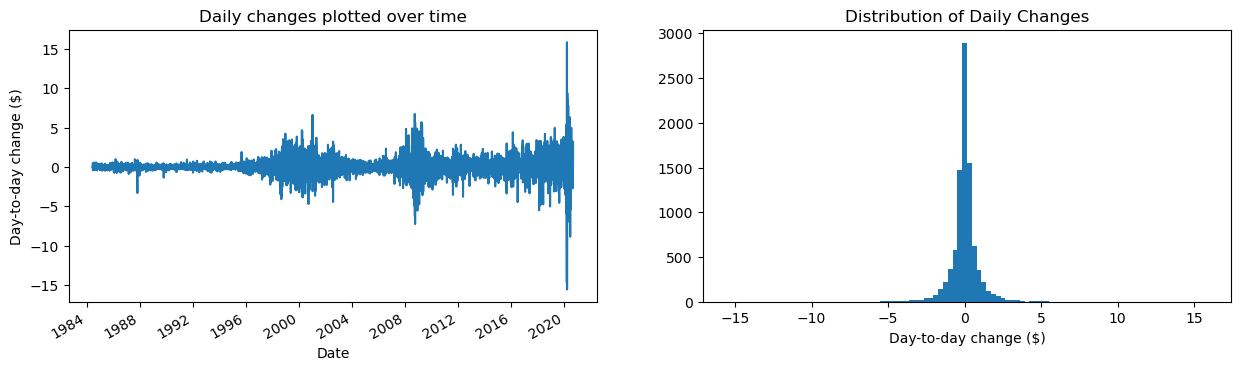

In [50]:
# Compute first difference
diff = prices - prices.shift(1)

# the subplot on the left
plt.subplot(121)
diff.plot(figsize=(15, 4))
plt.title("Daily changes plotted over time")
plt.ylabel("Day-to-day change ($)")

# the subplot on the right
plt.subplot(122)
diff.hist(figsize=(15, 4), bins=100, grid=False)
plt.title("Distribution of Daily Changes")
plt.xlabel("Day-to-day change ($)")

plt.show()

What can we notice here? Well, the points are more or less centered around 0. This is no surprise as the up and downs in the prices tend to cancel out each other. Also, the variations in the price changes are higher in certain periods. The histogram on the right shows that price changes tend to have a bell-shaped distribution but due to some extreme values in both sides, the tails of the histogram are more extended in both sides to -15 and +15. Statistically speaking such distribution has heavy tails compared to the standard normal distribution.

However, investors are interested in gains or losses per unit of investment. Therefore, we should look at returns or the day-to-day changes expressed in percent, 100*(p_t−p_t−1)/p_t−1.

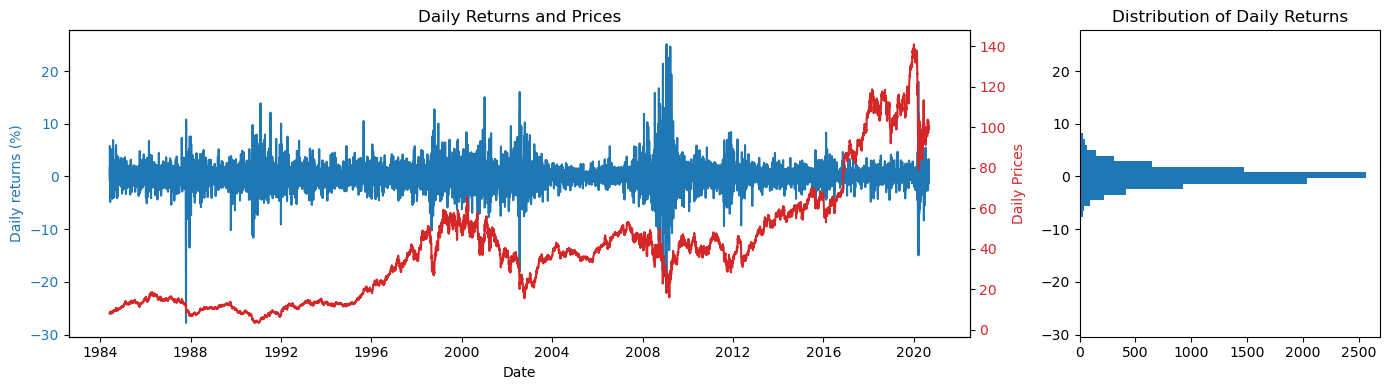

In [51]:
# Compute daily returns: divide the first difference by the price in the previous day
daily_percentage_change = 100 * diff / prices.shift(1)

# drop the first value which is NaN
daily_percentage_change.dropna(inplace=True)

# Plot the results and original prices together
# initialize two subplots in 1 row and two columns. Also specify the width of each plot
fig, ax1 = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw={"width_ratios": [3, 1]})

# subplot for daily_percentage_change
color = "tab:blue"
ax1[0].set_xlabel("Date")
ax1[0].set_ylabel("Daily returns (%)", color=color)
ax1[0].plot(daily_percentage_change, color=color)
ax1[0].tick_params(axis="y", labelcolor=color)

# Create twin axes, so they can share the same xaxis, i.e. Dates
ax2 = ax1[0].twinx()

# daily prices on the same subplot
color = "tab:red"
ax2.set_ylabel("Daily Prices", color=color)
ax2.plot(prices, color=color)
ax2.tick_params(axis="y", labelcolor=color)

plt.title("Daily Returns and Prices")

# create the second subplot which is the histogram of daily_percentage_change
ax1[1].hist(daily_percentage_change, bins=50, orientation="horizontal")
ax1[1].set_title("Distribution of Daily Returns")

fig.tight_layout()
plt.show()

The plot on the left reveals several interesting facts about the returns (blue, left axis) and prices (red, right axis). Changes in the returns are extremely high during the market crashes, namely, the Black Monday 1987, dot-com bubble around 2000, financial crisis 2007-08 and the recent market turmoils due to COVID19. During the remaining times, the changes are relatively smaller. In other words, large price changes tend to be followed by large price changes, and small price changes tend to be followed by small price changes. This phenomenon is called volatility clustering. The histogram on the right shows the distribution of returns which is similar to the Normal distribution except that tails are extended in both sides due to extreme observations.

#### Example - Return on Investment
The example above shows the day to day gains and losses of investing in the stock. We can also use shifting to compute the one-year return on investments by changing the number of lags to 1 year instead of 1 day. It is a convention to use 260 days (i.e. 52 weeks with 5 days in each week) as the number of business days in each year. So we use 260 as the lag number in order to calculate the gains or losses incurred by an investment made 1 year earlier. For demonstration purposes, we plot only the recent periods.

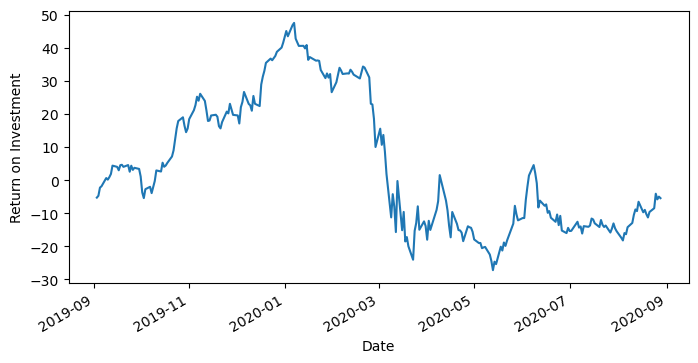

In [52]:
# Net profit over a year (in working days)
net_profit = prices - prices.shift(260)

# Return on Investment
roi = 100 * net_profit / prices.shift(260)

# Plot result
roi["2019-09-01":"2020-08-28"].plot(figsize=(8, 4))
plt.ylabel("Return on Investment")
plt.show()

Summary
Let’s summarize what we’ve learned in this unit. Here are a few takeaways:

We showed stock prices as a real example of time series data and explored the time index of the data
We showed how to create lagged time series data and worked out several examples
Appendix

***Note*** The Pandas diff(1) function performs the same job as the prices - prices.shift(1)

In [53]:
Pt.diff(1)

Date
2019-12-16     NaN
2019-12-17    0.84
2019-12-18   -0.14
2019-12-19   -0.69
2019-12-20   -0.11
2019-12-23   -0.04
2019-12-24    0.38
2019-12-26    1.46
2019-12-27    0.10
2019-12-30   -0.51
Name: Close, dtype: float64

In [54]:
Pt - Pt.shift(1)

Date
2019-12-16     NaN
2019-12-17    0.84
2019-12-18   -0.14
2019-12-19   -0.69
2019-12-20   -0.11
2019-12-23   -0.04
2019-12-24    0.38
2019-12-26    1.46
2019-12-27    0.10
2019-12-30   -0.51
Name: Close, dtype: float64

Also, using the Pandas function pct_change(1) we can calculate the price changes as prices.pct_change(1). This will produce the same results as (prices - prices.shift(1))/prices.shift(1).

***Note*** The shift() function has an input parameter freq. When we do not specify any input for this parameter, as in all the examples so far, the data values (here prices) are not attached to the data index (here dates). This means that with Pt.shift(1) we drop the last price out of the dataset (see below). However, if we specify the input parameter freq as in Pt.shift(1, freq='B') which means shifting forward by 1 business day, the prices are aligned with the dates and thus will not be dropped. Notice that in this case (see below) a new business day 2019-12-31 is created at the end of the dataframe Pt and the previous price is attached to it. You also notice that the NaN value for date 2019-12-16 is dropped in this case (see following figures).

In [55]:
Pt

Date
2019-12-16    137.34
2019-12-17    138.18
2019-12-18    138.04
2019-12-19    137.35
2019-12-20    137.24
2019-12-23    137.20
2019-12-24    137.58
2019-12-26    139.04
2019-12-27    139.14
2019-12-30    138.63
Name: Close, dtype: float64

In [56]:
Pt.shift(1)

Date
2019-12-16       NaN
2019-12-17    137.34
2019-12-18    138.18
2019-12-19    138.04
2019-12-20    137.35
2019-12-23    137.24
2019-12-24    137.20
2019-12-26    137.58
2019-12-27    139.04
2019-12-30    139.14
Name: Close, dtype: float64

The result shows that the original price of 138.63 for 2019-12-30 has been dropped, whereas the following code moves it to the next date: 2019-12-31.

In [57]:
Pt.shift(1, freq="B")

Date
2019-12-17    137.34
2019-12-18    138.18
2019-12-19    138.04
2019-12-20    137.35
2019-12-23    137.24
2019-12-24    137.20
2019-12-25    137.58
2019-12-27    139.04
2019-12-30    139.14
2019-12-31    138.63
Name: Close, dtype: float64

***Note*** The shift() method can be used for any type of index. By using an arbitrary index we show that it is indeed the data that moves not the index.

In [58]:
data = [1, 2, "t", 4]
indices = [4, "Tokyo", "blue", "dog"]
s = pd.Series(data, indices)
s

4        1
Tokyo    2
blue     t
dog      4
dtype: object

Now shifting the data we get

In [59]:
s.shift(1)

4        NaN
Tokyo      1
blue       2
dog        t
dtype: object

## Resampling and converting frequencies

In this unit, we take a look at ***resampling*** data at a higher or lower frequency.

### Pandas asfreq vs. resample
There are two ways to resample data at different frequencies: with the resample() function or with the asfreq() one. The main difference between them is that resample() is a data aggregation function while asfreq() is a data selection function.

More specifically

- asfreq() simply starts with the first data point and then takes consecutive data points at the new frequency interval
- resample() first splits the data into buckets based on the new frequency and then applies a particular operation to the data in each bucket

It is up to us to provide this second function that gets applied to the buckets of aggregated data. In this sense the resample() function allows us more flexibility.

### Downsampling
Let’s look at our example with the financial dataset. Let’s change the frequency to BA which is the end of a business year. We will first do this by combining the resample() with the mean() functions and compare the results with the asfreq() variant.

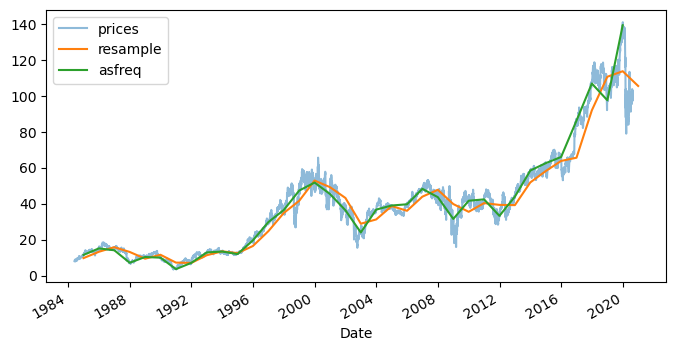

In [60]:
# Create the figure
plt.figure(figsize=(8, 4))

# Plot the prices
prices.plot(alpha=0.5)

# Downsampling - end of the business year
# Variant 1: using resample()
prices.resample("BA").mean().plot()

# Variant 2: using asfreq()
prices.asfreq("BA").plot()

plt.legend(["prices", "resample", "asfreq"], loc="upper left")
plt.show()

The resample() function reported the average values of the year while the asfreq() function reported the value at the end of the year. Their difference is more visible in the plot for the year 2020. Since the sample ends at 2020-08-28, the asfreq function resulted in no value for the year 2020, and reported the value for the end of 2019.

### Upsampling
What we performed above is known as downsampling because we decreased the frequency from day to year. We can also upsample and in this case, both resample() and asfreq() have the default of leaving up-sample points empty. With the parameter method we can specify however a strategy of filling in the gap. Two common choices are backward fill and forward fill.

Let’s compare the two methods.

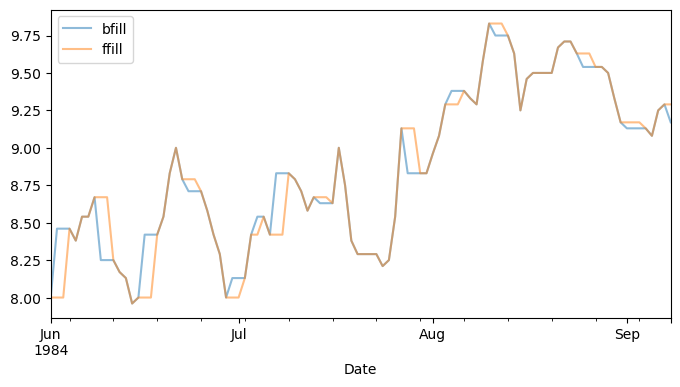

In [61]:
# Create the figure
plt.figure(figsize=(8, 4))

# Upsampling
# "backward fill" - fill missing with the closest value on the right
prices.asfreq("D", method="bfill")[0:100].plot(alpha=0.5)

# "forward fill" - fill missing with the closest value on the left
prices.asfreq("D", method="ffill")[0:100].plot(alpha=0.5)

plt.legend(["bfill", "ffill"], loc="upper left")
plt.show()

To better see the difference, we chose to focus on the first 100 entries only. However, the results are very similar in this case. Note that in this plot the frequency of prices has changed from business days to calendar days. Therefore, weekends and other missing days e.g. holidays are filled in the plot.

### Impact of downsampling on distribution of the data
We should note when we change the sampling frequency of the data, the distribution of the resulting sample may also change. Let’s perform the downsampling again using the resample() function.

Here are steps we take in the following:

- we use pct_change() function to calculate the price percentage changes
- we change the frequency of data using resample() function and the list ["B", "W", "M", "Q"]
- we take mean of the resampled data and drop null values generated in the previous steps
- we calculate the skewness and kurtosis of the data

In [62]:
from scipy.stats import skew, kurtosis

# calculate skewness and kurtosis for the resampled data
s, k = [], []
for freq in ["B", "W", "M", "Q"]:
    s.append(skew(prices.pct_change().resample(freq).mean().dropna()))
    k.append(kurtosis(prices.pct_change().resample(freq).mean().dropna()))

***Note*** 
Skewness and kurtosis inform us about the shape of a distribution. Skewness measures the degree of asymmetry around the center. For example, normal distribution is symmetric and has skewness 0. A skewness of smaller or larger than 0 indicates some degree of asymmetry. Kurtosis measures how the tails are stretched on both sides of the distribution. For instance, normal distribution has kurtosis 3, and kurtosis of larger than 3 indicates that the tails of the distribution are further stretched (are fat) compared to the normal distribution.

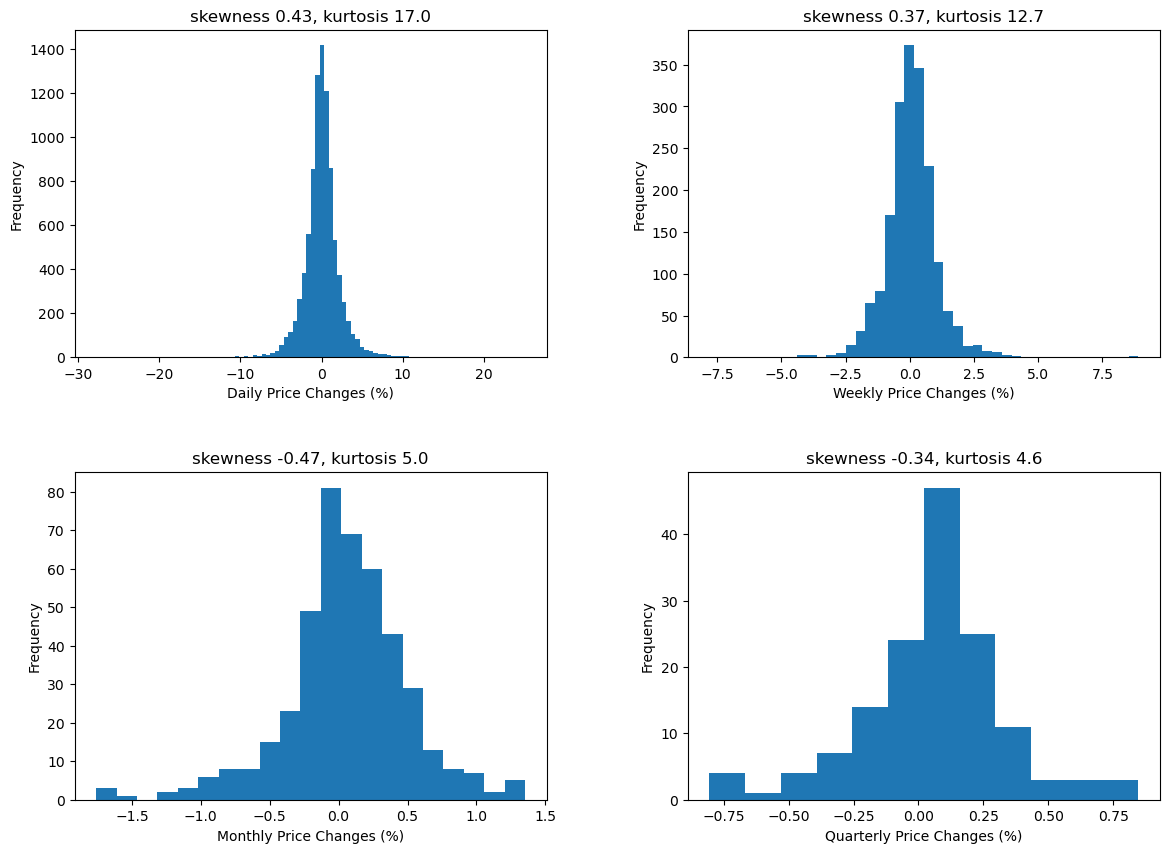

In [63]:
fig, axes = plt.subplots(
    nrows=2, ncols=2, figsize=(14, 10), gridspec_kw={"hspace": 0.35, "wspace": 0.3}
)

for (ax, resamp, freq, n_bin, i) in zip(
    axes.flatten(),
    ["B", "W", "M", "Q"],  # resampling frequency
    ["Daily", "Weekly", "Monthly", "Quarterly"],  # x-axis labels
    [96, 44, 21, 12],  # number of bins
    [0, 1, 2, 3],  # skewness and kurtosis as titles
):

    ax.hist(100 * prices.pct_change().resample(resamp).mean(), n_bin)

    ax.set(
        xlabel=freq + " Price Changes (%)",
        ylabel="Frequency",
        title="skewness {:.2f}".format(s[i]) + ", kurtosis {:.1f}".format(3 + k[i]),
    )

plt.show()

We note that by going from daily to quarterly frequency, the kurtosis decreases towards the kurtosis of a normal distribution that is 3. This means that the tails of the distributions become less fat. For instance, in the quarterly case, all the extreme price movements that happen within a quarter are averaged out, and therefore, less extremes appear in the tails of the distribution and kurtosis decreases.

The standard normal distribution with kurtosis 3 is known to have thin tails. Therefore, variables whose distributions have kurtosis larger than 3 are known to have fat tails or heavy tails.

### Summary
Let’s summarize what we’ve learned in this unit. Here are a few takeaways:

We showed how to resample time series data at a higher or lower frequency
Depending on our objective we choose the resampling frequency
We showed that distribution of the resampled data can change
In the next unit, we show how to use the rolling windows for time series data.

## Rolling windows

In this unit we introduce the concept of a rolling window. This is achieved with the rolling() function. We can think of this as the time series equivalent of the groupby function. The main goal is to aggregate the data in different ways.

### Example - rolling mean and standard deviation
As an example, let’s compute a one year rolling mean and standard deviation of our financial data from the previous units. As we are dealing with business days we will use window length of 260 business days (52 weeks) for our 1 year window.

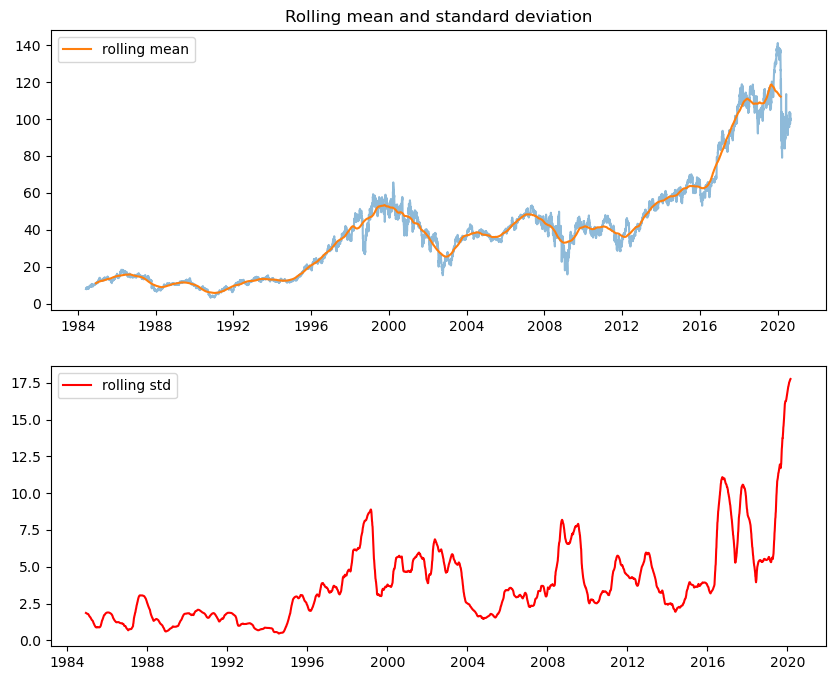

In [64]:
# Compute rolling mean and std
rolling_mean_1year = prices.rolling(260, center=True).mean()
rolling_std_1year = prices.rolling(260, center=True).std()

# Setup plot
fig, axes = plt.subplots(2, figsize=(10, 8))

# Plot rolling mean and std
axes[0].set_title("Rolling mean and standard deviation")
axes[0].plot(prices, alpha=0.5)
axes[0].plot(rolling_mean_1year, label="rolling mean")
axes[0].legend()
axes[1].plot(rolling_std_1year, c="red", label="rolling std")
axes[1].legend()
plt.show()


We can see that pandas computed the mean on each window of data given by the period of 260 business days that we chose.

***Note :*** Note that the series rolling_mean_1year has 130 NaN at the start because for the first 130 business days the rolling window was not entirely filled with data from prices. Similarly there are 129 NaN at the end of the series. The same is true for the series rolling_std_1year.

### Using rolling windows to detect outliers in time series
For time series we often look for points which deviate from local behavior (local outliers). Below we detect local outliers by using the rolling window to compare a value with its preceding values (center=False) or its surrounding values (center=True). Here we use the rolling mean and rolling standard deviation to create bounds on acceptable values. A value that falls outside these bounds is flagged as an outlier candidate.

In [65]:
def detect_outliers_rolling(timeseries, days=10, n_std=2, center=False):

    rolling_mean = timeseries.rolling(window=days, center=center).mean()
    rolling_std = timeseries.rolling(window=days, center=center).std()
    lower_bound = rolling_mean - (n_std * rolling_std)
    upper_bound = rolling_mean + (n_std * rolling_std)

    # Identify outliers
    mask = (timeseries < lower_bound) | (timeseries > upper_bound)
    outliers = timeseries[mask]

    # Plot bounds and outliers
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, "lightblue", label="Time series")
    plt.plot(rolling_mean, "orange", label="Rolling mean")
    plt.plot(upper_bound, "r--", label="Bounds", alpha=0.5)
    plt.plot(lower_bound, "r--", label="", alpha=0.5)
    plt.plot(outliers, "ro", markersize=5, label="Outlier candidate")
    plt.legend(loc="best")
    plt.grid(True)
    plt.title(
        "{} outliers detected using a moving window of size = {}".format(
            len(outliers), days
        )
    )
    plt.show()

The time period and the parameter values below were chosen for the purpose of a good plot. Feel free to explore different time periods and parameter values.

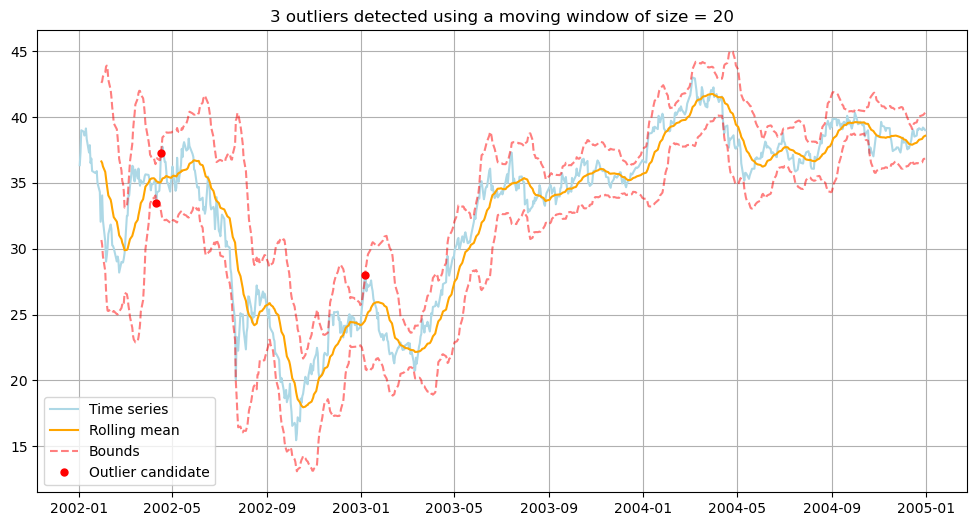

In [66]:
detect_outliers_rolling(prices["2002":"2004"], days=20, n_std=3)

Some final observations:

Increasing the window size will weaken the change of the current mean and std due to a new timepoint.
When the curve is moving up or down for a longer period of time then the local standard deviation grows, thus widening the bounds outside which points have to fall in order to get flagged as outliers.
Setting center=True requires us to use data from the future and thus can only be used to detect outliers in hindsight.
With center=False we are trying to detect a change in behavior compared to the preceding window. This could indicate the imminent failure of a machine or a novel behavior of consumers.

### Summary
Let’s summarize what we’ve learned in this unit. Here are a few takeaways:

Rolling windows are a way to aggregate the data over time
The choice of the window’s length depends on the frequency of data as well as our objective
As an example we used rolling windows to detect outliers in the data
In the next unit, we present an exercise and ask you to use the rolling windows for Swiss temperature data.

## Exercise: temperature and weather data
### Task 1: Swiss Temperature Data
In this exercise you will use Swiss temperature data which describes the average temperature measured across various altitudes in Switzerland. The measurement has been available in monthly frequency since 1864 and is continuously updated with the most recent values. The objective is to apply on real data some of the methods presented so far in this subject.

From the Resource tab you can download the exercise notebook, the solution notebook and the 10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt data.

├── c2_exercise_temperature.ipynb

├── c2_solution_temperature.ipynb

└── c2_10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt


***GO TO C2_exercise_temperature.ipyn***

### Task 2: Szeged Weather Data
In this exercise, you will investigate daily temperature data from Szeged in Hungary between the years of 2006 and 2016.

From the Resource tab you can download the solution notebook and the weatherHistory.csv data. The original data can be found on here on kaggle website.

├── c2_solution_weather.ipynb
└── c2_weatherHistory.csv

Once the data is saved in your working directory you can load them as follows

## 07. Trends and cycles 
In this and the subsequent units, we discuss several properties of time series data that one should know before building models. In general, when investigating time series data, it is helpful to start with visual inspections as many properties of the time series can be detected by simply looking at their plots.

Some time series data exhibit a trend over time. The trend can be upward or downward, but it is also common to see that the trend changes its direction over time, i.e., upward for a while and then followed by a downward trend. Moreover, time series data can have cyclical variations. The term cycle refers to recurring patterns over time.

In the following, we show examples of such patterns using the Swiss temperature dataset.

### Trends in the Swiss temperature data

We use the monthly Swiss temperature data from the previous unit. The data describes the average temperature measured at various altitudes in Switzerland from 1864 to 2020. We repeat the same steps as in the exercise to create a dataframe where each row represents a month.

In [9]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# load the data
data = pd.read_csv(
    "Ressources/c2_10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt",
    index_col="time",
    sep="\t",
    skiprows=15,
)

# Print the shape of the dataframe
print(data.shape)

# Select the first 12 columns
data_m = data.loc[:, "jan":"dec"]

# Create a new dataframe with new index and columns 'Year', 'Month' and 'Temp'
df = (
    data_m.stack()  # create a multi-index dataframe with the year at level 0 and the month at level 1
    .reset_index()  # reset the index of the new dataframe
    .rename(
        columns={0: "Temp", "time": "Year", "level_1": "Month"}
    )  # give new names to the columns
)
# Create dates
df["Date"] = pd.date_range("1864-jan", periods=df.shape[0], freq="M")

# Let the dates to be the index
df.set_index("Date", inplace=True)

(157, 19)


In [4]:
df.head()

Year Month  Temp
Date                        
1864-01-31  1864   jan -7.10
1864-02-29  1864   feb -4.52
1864-03-31  1864   mar  0.04
1864-04-30  1864   apr  2.11
1864-05-31  1864   may  7.43

Let’s check the pattern that results from a 10 years rolling window.

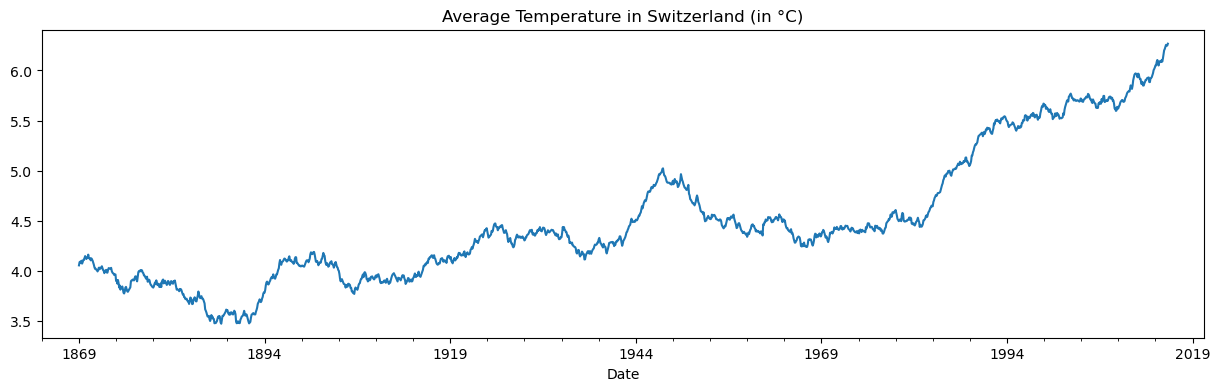

In [10]:
# set the figure size
plt.figure(figsize=(15, 4))

# plot the Temperature
df["Temp"].rolling(120, center=True).mean().plot()  # 120 months : 10 years
plt.title("Average Temperature in Switzerland (in °C)")
plt.show()

The plot shows many ups and downs over many sub-periods, but in general, it has an upward trend over the whole period. In particular, since 1985, the average temperature is increasing most of the time. Next, we explore cyclical variations.

#### Seasonality in the Swiss temperature data
In general, temperature data exhibits cycles with a fixed frequency i.e. they show seasonal variations. Below, we show a few graphical ways to explore trends and seasonality in the Swiss temperature data.


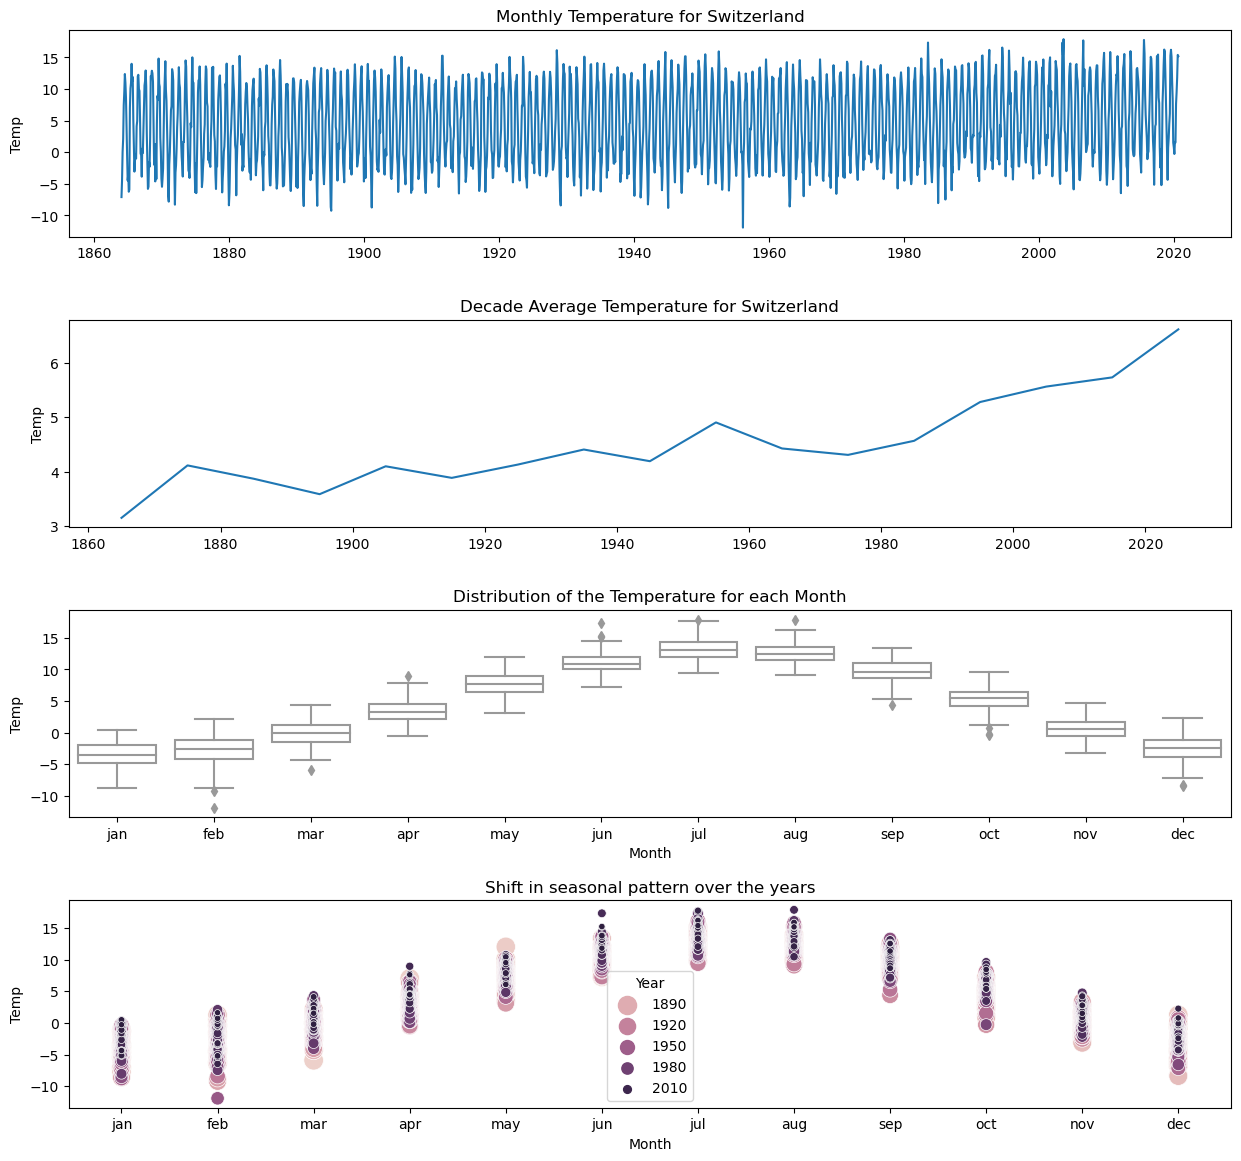

In [11]:
# defining the number of subplots, setting the size, and the space between the subplots
fig, axes = plt.subplots(4, 1, figsize=(15, 14), gridspec_kw={"hspace": 0.4})

# 1st plot: line plot of monthly temperature
axes[0].plot(df["Temp"])
axes[0].set_title("Monthly Temperature for Switzerland")
axes[0].set_ylabel("Temp")

# 2nd plot: line plot of average temperature per decade (A: annual)
axes[1].plot(df["Temp"].resample("10A").mean())
axes[1].set_title("Decade Average Temperature for Switzerland")
axes[1].set_ylabel("Temp")

# 3rd plot: box plot of monthly temperature for every month
sns.boxplot(data=df, x="Month", y="Temp", color="white", ax=axes[2])
axes[2].set_title("Distribution of the Temperature for each Month")

# 4th plot: scatter plot of monthly temperature against month
sns.scatterplot(data=df, x="Month", y="Temp", hue="Year", size="Year", sizes=(200, 20))
axes[3].set_title("Shift in seasonal pattern over the years")

plt.show()

The plot on the top reveals strong seasonal variations in the monthly temperatures from 1864 to 2020. The second plot shows that by taking the average of the monthly values in each decade, we can smooth out all the seasonalities and reveal an upward and long-term trend in temperature over the whole period. The last two plots focus on the seasonal component that is very strong and is repeating every year. The repetitive peaks show the months with the highest temperature each year (often July). The repetitive minimum values show the months with the lowest temperature each year (usually January). The boxplot also shows the temperature distribution for each month. In particular, it shows that some winters were extremely cold, and some summers were very hot. The last plot shows that the seasonal pattern has shifted up over the most recent decades.

***Tips and Tricks :***
Cycles with a fixed frequency are referred to as seasonalities because they are associated with some aspect of the calendar and happen at a fixed frequency (e.g. weather temperature). On the other hand, some phenomena show cyclical patterns with varying frequencies (e.g. business cycles).

We can observe seasonality in many phenomena, not just weather data. For instance, gasoline consumption rises in summer due to increased traveling. Airline prices rise in summer due to increased tourism. Construction activity decreases in winter, and consumer spending increases in November and December due to holiday shopping. Moreover, the periodic variation is not necessarily limited to a specific season in a year; time series data can have cycles with periods of more than one year. For example, the business cycle expansions and contractions usually occur over several years.

#### Summary
Let’s summarize what we’ve learned in this unit.

We defined trends and cycles in time series data.
We showed a few ways to visualize trends and cycles in time series data.
The analysis of time series data entails studying their trends, cycles and distributions.
Later in this subject, we discuss trends and cycles in more detail. We will also discuss inherent randomness in time series data which can perturb the trends and cycles.

## 08. Temporal dependencies in time series data 

In this unit, we discuss the so-called time dependency or temporal dependency in time series data through visualization.

Some time series data carry information from one period to the next. For instance, the total sales of a supermarket at the end of a day is not very different from the total sales at the end of the previous day. Similarly, the number of people eating at a restaurant during the last weekend could approximate the same quantity next weekend. The strength of this dependency from one period to the next does not remain the same across all periods. For instance, in the time series that shows the daily sales of a supermarket, the total sales on Thursday can be very close to Wednesday’s sales, whereas the total sales on Saturday might be far from Friday’s sales. Moreover, the strength of this dependency can change if we don’t take two consecutive periods. For example, the temperature in July is more related to the temperature in June than in April.

*** Tips and Tricks : ***
This temporal (time) dependency is also called autocorrelation or serial correlation. Similar to the correlation between two variables, autocorrelation measures the correlation across time periods within a single variable.

### Time dependency in the unemployment rates
Let’s check the quarterly unemployment rates (in percentage) for Switzerland from 1970 to 2019. The idea is to see if the unemployment rate at every quarter depends on the past rates. The ‘past’ can be just the previous quarter, or 2 quarters ago, or even 3 or 4 quarters ago. In the case of the past 4 quarters, we are checking if the current quarter’s rate depends on the rate of the same quarter but in the previous year. In the following, we visually inspect this idea.

Let’s download all the data required for this unit from the resources tab of this unit, and then import the unemployment rates data.


In [13]:
# load unemployment rates
data = pd.read_csv("Ressources/c2_LMUNRRTTCHQ156S.csv", index_col="DATE")
data.index = pd.to_datetime(data.index, format="%Y-%m-%d")

data.shape

(197, 1)

In [14]:
# check a few values at the end of the data
data.tail()

LMUNRRTTCHQ156S
DATE                       
2018-01-01         2.880751
2018-04-01         2.656838
2018-07-01         2.544365
2018-10-01         2.446708
2019-01-01         2.393524

In [15]:
# let's get more information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197 entries, 1970-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LMUNRRTTCHQ156S  197 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


The index is already a DatetimeIndex.

Now, let’s make scatter plots of the data with itself but when they are lagged by 1,2 and 3 quarters.

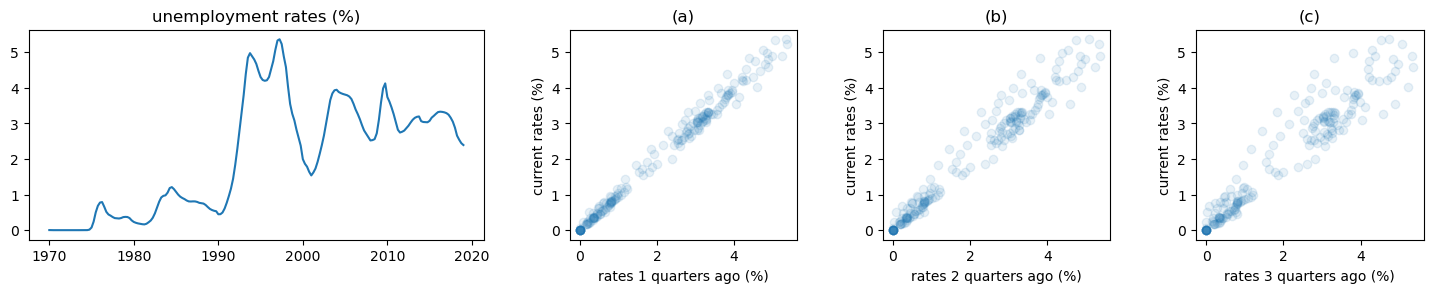

In [16]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=4,
    figsize=(18, 3),
    gridspec_kw={"wspace": 0.3, "width_ratios": [2, 1, 1, 1]},
)

# the first plot on the left
axes[0].plot(data)
axes[0].set(title="unemployment rates (%)")

for (ax, lag, t) in zip(axes[1:].flatten(),     # get the axes, ignore axes[0], it is already plotted and titled 
                        [1, 2, 3],              # get the lags of 1,2 and 3 quarters in 'lag'
                        ["(a)", "(b)", "(c)"]): # get the titles in 't'

    ax.scatter(data[:-lag], data[lag:], alpha=0.1)  
    ax.set(
        xlabel="rates " + str(lag) + " quarters ago (%)",
        ylabel="current rates (%)",
        title=str(t),
    )
    
# adjust the spaces
fig.subplots_adjust(bottom=0.2, top=0.9)
plt.show()


Note that data[lag:] is the unemployment rates which is shifted forward by the number of lags. To draw the scatter plot we should have equal number of observations in both x and y axes and therefore we should drop the last observation in data[:-lag].

The first plot from the left shows the evolution of the unemployment rates over time. We note that in plot (a), the rates in the two consecutive quarters are closely related. This is expected because it is unlikely that the rates change rapidly from one quarter to the next. However, this time dependency is less strong in plots (b) and (c), i.e. autocorrelation becomes weaker.

### Pandas function for visualization of time dependency
Instead of using the scatter plot to plot the time series data against its lagged values, we can use the lag_plot from Pandas. The advantage of using the lag_plot is that we don’t need to create the lagged data manually. In the following, we visualize the temporal dependencies in several time series data: stock prices, gross domestic product (GDP), temperature and random samples generated from standard normal distribution.

Let’s load these data first.

In [19]:
from pandas.plotting import lag_plot
import numpy as np

# load stock prices
data = pd.read_csv("Ressources/c2_financial_data.csv", index_col="Date")
data.index = pd.to_datetime(data.index, format="%d.%m.%y")
prices = data["Close"]

# load GDP data
gdp = pd.read_csv("Ressources/c2_CPMNACSAB1GQCH.csv", index_col="DATE")
gdp.index = pd.to_datetime(gdp.index, format="%Y-%m-%d")

#  load temperature data
temp = pd.read_csv(
    "Ressources/c2_daily-min-temperatures.txt", parse_dates=["Date"], index_col="Date"
)

# generate random numbers from standard normal distribution
np.random.seed(5)
data_numbers = pd.DataFrame(
    np.random.normal(size=240),
    columns=["random_numbers"],
    index=pd.date_range("2001-jan", periods=240, freq="M"),
)

Let’s create the scatter plots with the lag_plot

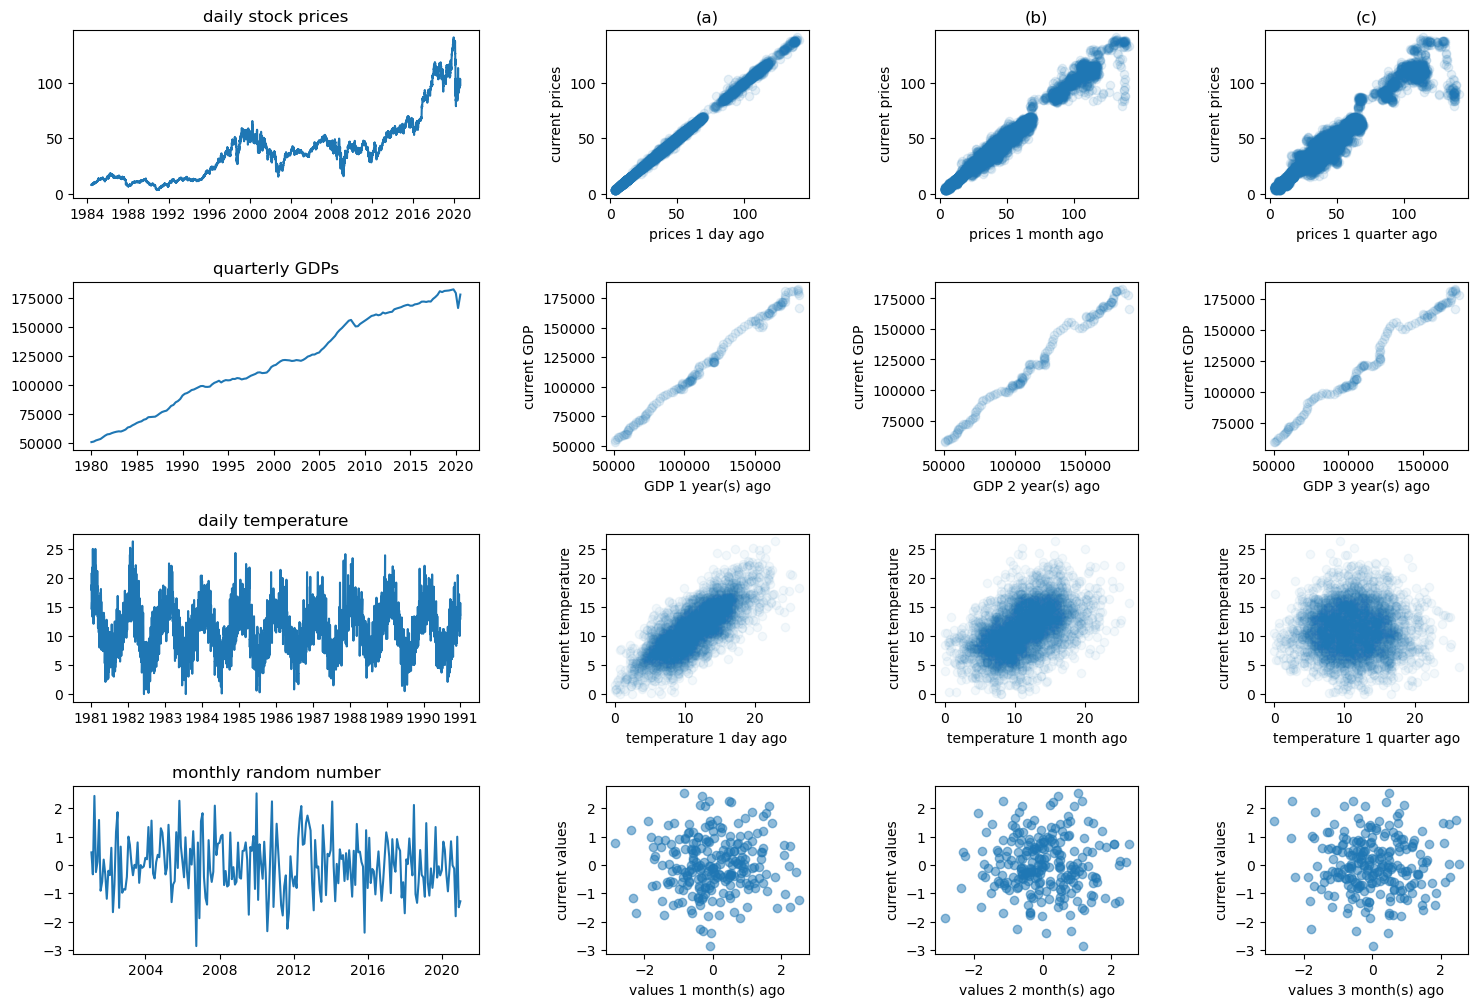

In [20]:
fig, axes = plt.subplots(
    nrows=4,
    ncols=4,
    figsize=(18, 12),
    gridspec_kw={"hspace": 0.5, "wspace": 0.5, "width_ratios": [2, 1, 1, 1]},
)

# plot data in the first column
# axes goes from row 0 to row 3, but the column remains 0
axes[0, 0].plot(prices)
axes[1, 0].plot(gdp)
axes[2, 0].plot(temp)
axes[3, 0].plot(data_numbers)

# set titles for the plots in the first column
axes[0, 0].set(title="daily stock prices")
axes[1, 0].set(title="quarterly GDPs")
axes[2, 0].set(title="daily temperature ")
axes[3, 0].set(title="monthly random number")

#  plot stock prices
for (ax, lag, _lag, t) in zip(
    axes[0, 1:].flatten(),
    [1, 21, 61],
    ["day", "month", "quarter"],
    ["(a)", "(b)", "(c)"],
):

    lag_plot(prices, lag=lag, ax=ax, alpha=0.1)
    ax.set(
        xlabel="prices 1 " + str(_lag) + " ago",
        ylabel="current prices",
        title=str(t),
    )

#  plot GDP data
for (ax, lag) in zip(axes[1, 1:].flatten(), [4, 8, 12]):

    lag_plot(gdp, lag=lag, ax=ax, alpha=0.1)
    ax.set(xlabel="GDP " + str(int(lag / 4)) + " year(s) ago", ylabel="current GDP")

#  plot temperature data
for (ax, lag, _lag) in zip(
    axes[2, 1:].flatten(), [1, 30, 90], ["day", "month", "quarter"]
):

    lag_plot(temp, lag=lag, ax=ax, alpha=0.05)
    ax.set(xlabel="temperature 1 " + str(_lag) + " ago", ylabel="current temperature")

# plot random numbers
for (ax, lag) in zip(axes[3, 1:].flatten(), [1, 2, 3]):

    lag_plot(data_numbers, lag=lag, ax=ax, alpha=0.5)
    ax.set(xlabel="values " + str(lag) + " month(s) ago", ylabel="current values")

plt.show()

Each row in the above visualization belongs to a different dataset. In the first row, stock prices (in dollars) are shown along with three lag plots in columns (a) to (c). The lag plot in column (a) shows that prices in two consecutive days are strongly related. This relationship is less strong for the plot in column (c), where the lag is one quarter rather than one day.

The first plot in the second row shows the upward trend in the GDP of Switzerland in millions CHF. The lag plot in column (a) shows that GDP values in two consecutive years are strongly related to each other. The lags in columns (b) and (c) are 2 and 3 years rather than just 1 year, which results in less strong dependencies. Overall, the relationships remain strong across the three lags because GDP is measured quarterly and slowly changes over the years.

The first plot in the third row reveals the seasonality of Melbourne’s daily temperatures. The lag plot in column (a) shows that the temperatures of two consecutive days are strongly related, whereas the temperatures of two consecutive quarters in plot (c) are not related.

Finally, the last row shows the pattern and lag plots for the random values from the normal distribution. The lag plots in columns (a) to (c) show that, as expected, there is no relation between the values no matter what the lag value is.

### Summary
Let’s summarize what we’ve learned in this unit.

We defined temporal dependency in time series data and showed examples of this property.
We showed how to use scatterplots and lag plots to visualize the temporal dependency in time series data.
The analysis of time series data entails studying the potential time dependencies in the data.
Visual inspection as described in this unit is an easy way to check for temporal dependency. Still, one can use statistical tests to investigate the hypothesis that autocorrelation exists in data or not. Later in this subject, we discuss how to perform and interpret such tests.

## 09 Stationary and non-stationary data

In this unit, we discuss stationarity in time series data through visualization.

Stationarity is a concept related to the behavior of time series data over time. Suppose that some people are talking and you are listening to them. Naturally, the words that they use change over time, but imagine that their manner also changes over time; they start talking slowly, continue very fast, and slow down again but speak loudly. It is difficult to understand their way of speaking and predict what comes next. It would have been easier to follow them if they had kept the same manner of speaking. In time series analysis, the data is non-stationary if it shows different behavior over time. In the following, we use the stock prices of a large bank to visualize such behavior.

### Non-stationarity in time series data
Below we visually inspect the evolution of the prices over time and discuss why the prices are non-stationary. Let’s load the data.


In [21]:
# load data
data = pd.read_csv("Ressources/c2_financial_data.csv", index_col="Date")
data.index = pd.to_datetime(data.index, format="%d.%m.%y")

prices = data["Close"]

Let’s plot the prices over time and also plot the histogram for prices

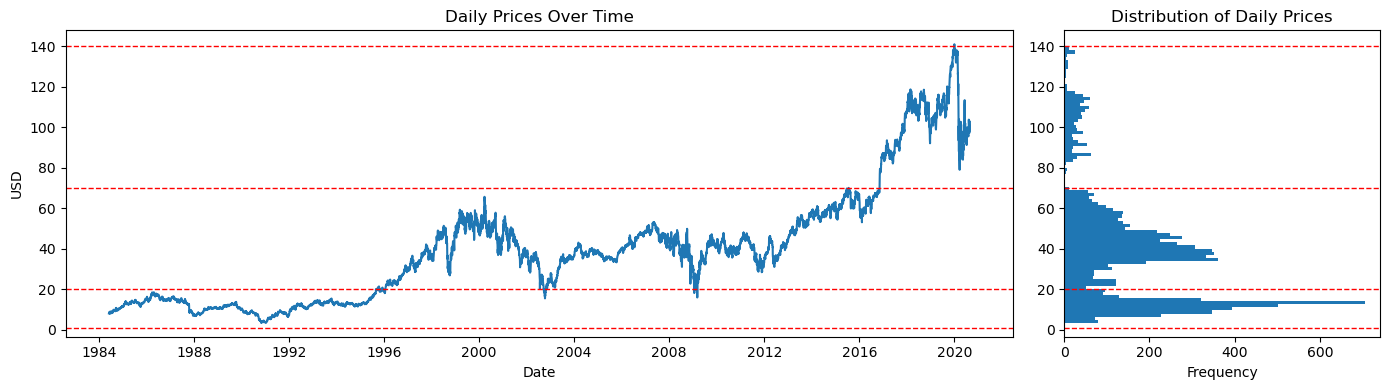

In [22]:
# Plot the trend and histogram of prices together
# initialize two subplots in 1 row and 2 columns. Also specify the size and width of each plot
fig, ax = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw={"width_ratios": [3, 1]})

# create the first plot for the prices over time
ax[0].plot(prices)
ax[0].set_title("Daily Prices Over Time")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("USD")

# let's draw the horizontal red lines at some pre-set values
for i in [1, 20, 70, 140]:
    ax[0].axhline(i, color="r", linewidth=1, linestyle="--")

# create the histogram of prices in the second plot
ax[1].hist(prices, bins=90, orientation="horizontal")
ax[1].set_title("Distribution of Daily Prices")
ax[1].set_xlabel("Frequency")

# draw again the horizontal lines
for i in [1, 20, 70, 140]:
    ax[1].axhline(i, color="r", linewidth=1, linestyle="--")

fig.tight_layout()
plt.show()


The plot on the left shows the level of the prices, whereas the plot on the right shows the distribution of prices. This is an example of non-stationary data. Firstly, the price has an increasing trend over the whole period, i.e., the price level is not the same over time. Secondly, we note that from 1984 to 1996, the price varies between about 1 to 20 dollars. This range is about 20 to 70 dollars from 1996 to 2016 and 70 to 140 dollars from 2016 to 2020. In short, the level and variance of the prices change over time. Sometimes they move very smoothly, and in other times they are very volatile. This behavior is also evident in the histogram on the right. It shows that the shares of the bank are traded at prices in three different ranges. Statistically speaking, the distribution of the prices changes over time and therefore, the price data are non-stationary.

*** Tips and Tricks : ***
For some models the predictions based on stationary data are more reliable than on non-stationary data. Therefore, it is necessary to check the behavior of data before starting to build a model. Visual inspection, as described in this unit, is an easy way to check for this. Still, one can always use statistical tests to investigate the hypothesis that a data set is stationary or not.

What we observed about our price data is often true for prices of other stocks. However, we should note that other time series data may show different behavior than that of stock prices. In the following, we show plots of four synthetic time series data over 100 time steps and discuss if they are stationary.
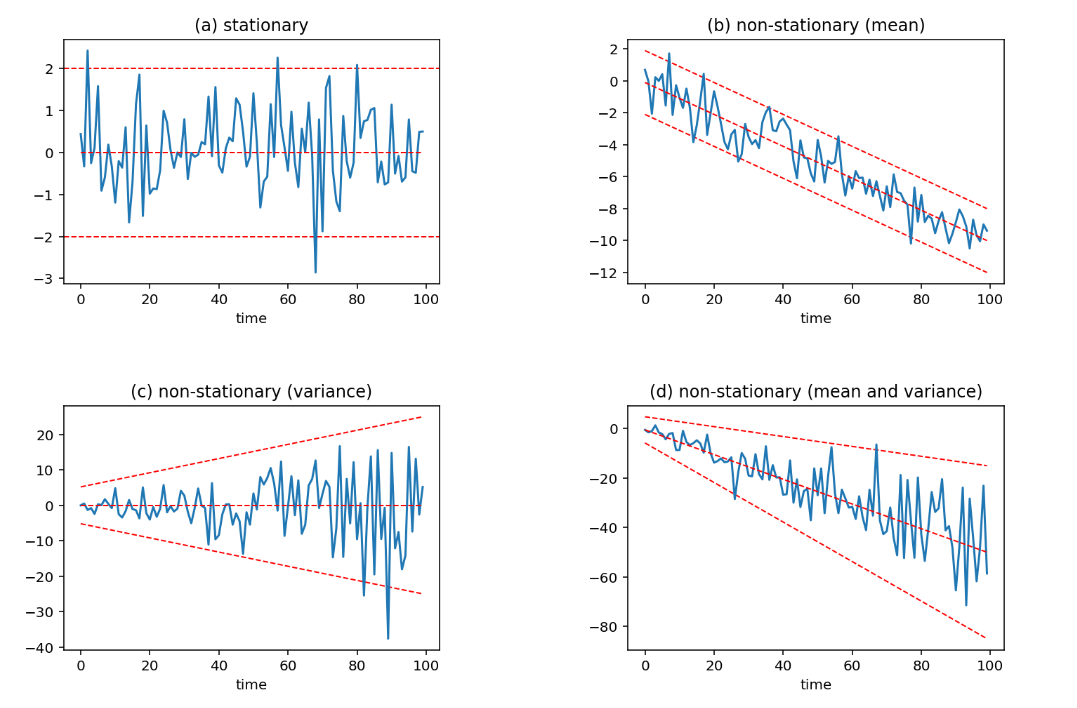

The values in plot (a) swing around zero all the time. Their up and downs also are always within a certain boundary. This may indicate that the data is stationary. However, in plot (b), although the up and downs also are always within a certain boundary, the level around which the values swing is not flat. Therefore, the data may not be stationary due to the downward trend. The level of the data in plot (c) is the same as in plot (a). It is flat at zero. However, the variance is expanding over time, and therefore the data may not be stationary due to the non-constant variance. Finally, the data in plot (d) may not be stationary due to the non-flat level and non-constant variance.

### Summary
Let’s summarize what we’ve learned in this unit.

- We defined stationarity and non-stationarity in time series data and showed examples of this property.
- We used simulated data to show non-stationarity in the mean and variance.
- The analysis of time series data entails studying the potential non-stationarity in the data.
Later in this subject, we discuss statistical tests of stationarity and show how to transform a non-stationary data set to a stationary one.

## 10. Decomposition of data into trends and cycles
### This unit is optional
We learned how to identify trends and cycles in time series data through visual inspection in the previous units. In this unit, we continue learning about them more formally and see how they contribute to the data dynamic over time.

In general, time series data consist of two main components. The first component can be predicted and includes at least one of these three parts (1) level, (2) trend, and (3) cycle. The level refers to the value around which the data may fluctuate. For instance, the daily temperature in July may fluctuate around 25 centigrade. Sometimes the level can be interpreted as the average value of the time series. The trend refers to the upward or downward patterns in the data. For instance, there is an upward trend in the temperature from winter to summer. Finally, the cycle refers to the recurring patterns over time. For example, temperature data exhibit seasonal patterns. The second component is the random part which is not predictable.

More formally, we can describe a time series yt  as a linear combination of these components:

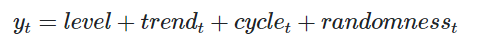

### Trends and cycles in simulated time series data
In the following, we simulate time series yt based on several scenarios. Let’s generate daily temperature values for July that fluctuate around the value of 25 centigrade and then plot them.
 

In [23]:
# generate the random component for 30 days
x_t = pd.Series(np.random.normal(size=30))

# set the level
level = 25

# time series y_t
y_t = level + x_t

*Warning:* Note that each time you run this code, you will get different values for y because the random term x changes after each run. To get the same values as in the content, you can fix the seed using np.random.seed(5).

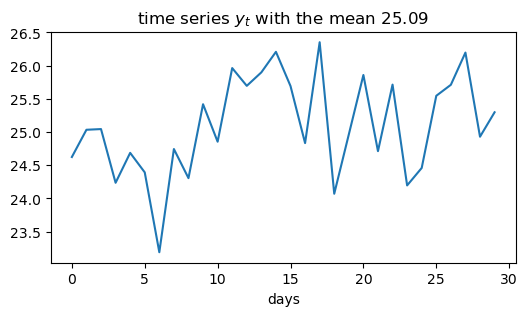

In [24]:
y_t.plot(figsize=(6, 3))
plt.title("time series $y_t$ with the mean {:.2f}".format(y_t.mean()))
plt.xlabel("days")

plt.show()

The values randomly move around the level. Let’s add also a downward trend to the data. We can think of yt as temperature values from August to October.

In [25]:
# generate the random component for 90 days
x_t = pd.Series(np.random.normal(size=90))

# generate the trend
tr_t = level + pd.Series(-0.08 * np.linspace(1, 90, 90))

# time series y_t
y_t = tr_t + x_t

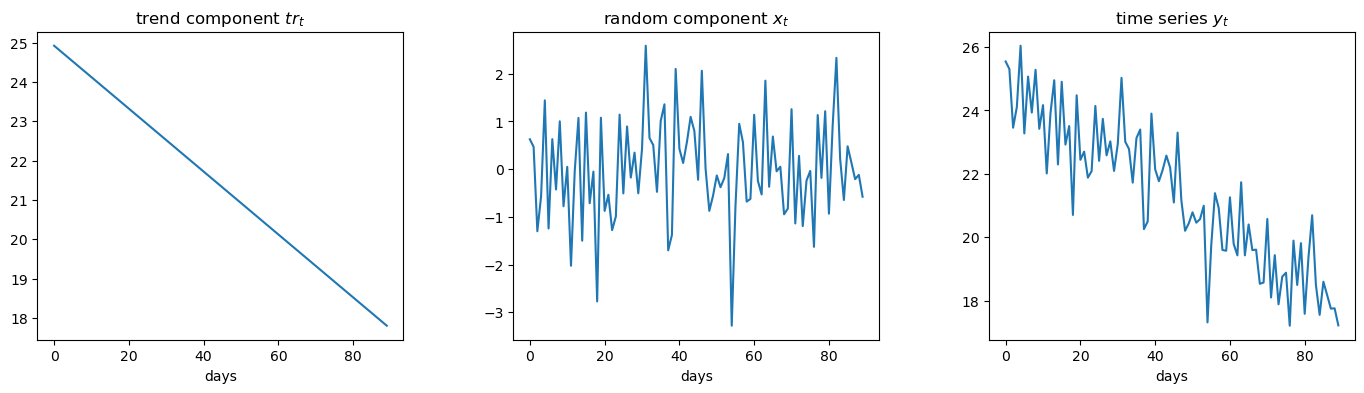

In [26]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(17, 4),
    gridspec_kw={"hspace": 0.3, "wspace": 0.3},
)

tr_t.plot(ax=axes[0])
axes[0].set_title("trend component $tr_t$")
axes[0].set_xlabel("days")

x_t.plot(ax=axes[1])
axes[1].set_title("random component $x_t$")
axes[1].set_xlabel("days")

y_t.plot(ax=axes[2])
axes[2].set_title("time series $y_t$")
axes[2].set_xlabel("days")

plt.show()

The plot on the right is a linear combination of the first two plots and shows a downward trend that is perturbed with random noise. Let’s add a seasonal component using a cosine wave. We can think of 
y
t
 as the monthly temperature values over three years.

In [27]:
# generate the random component for 36 months
x_t = pd.Series(np.random.normal(size=36))

# generate the seasonal term
t = np.linspace(1, 36, 36)
s_t = pd.Series(5 * np.cos(1 * np.pi * t / 6 + 1 * np.pi))

# time series y_t
y_t = s_t + x_t

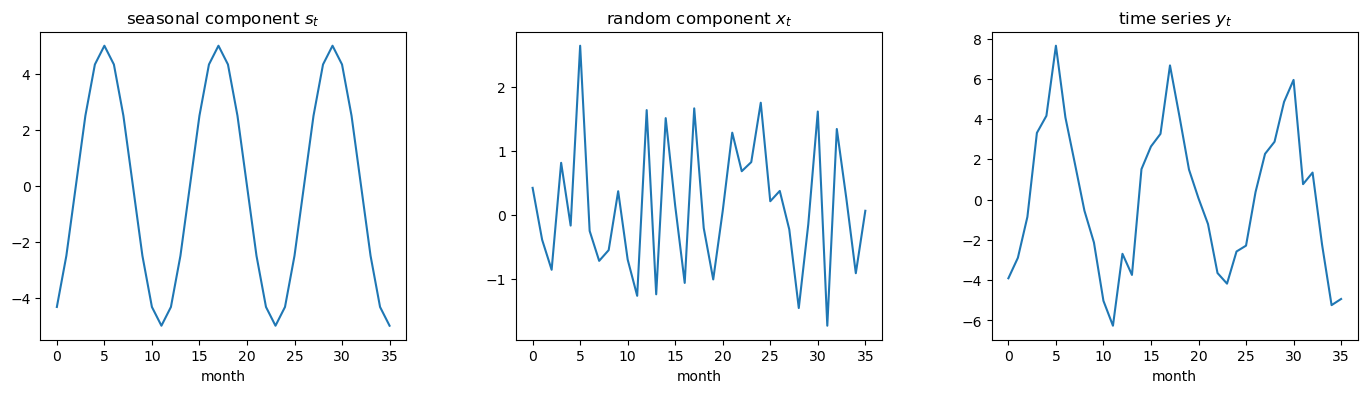

In [28]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(17, 4),
    gridspec_kw={"hspace": 0.3, "wspace": 0.3},
)

s_t.plot(ax=axes[0])
axes[0].set_title("seasonal component $s_t$")
axes[0].set_xlabel("month")

x_t.plot(ax=axes[1])
axes[1].set_title("random component $x_t$")
axes[1].set_xlabel("month")

y_t.plot(ax=axes[2])
axes[2].set_title("time series $y_t$")
axes[2].set_xlabel("month")

plt.show()

As in the previous case, the plot on the right is a linear combination of the first two plots and shows a seasonal pattern perturbed with random noise.

It is also possible to add an upward trend to resemble global warming over a longer period.

In [29]:
# generate the random component for 120 months
x_t = pd.Series(np.random.normal(size=120))

# generate the trend
t = np.linspace(1, 120, 120)
tr_t = pd.Series(0.08 * t)

# generate the seasonal term
s_t = pd.Series(5 * np.cos(1 * np.pi * t / 6 + 1 * np.pi))

# time series y_t
y_t = tr_t + s_t + x_t

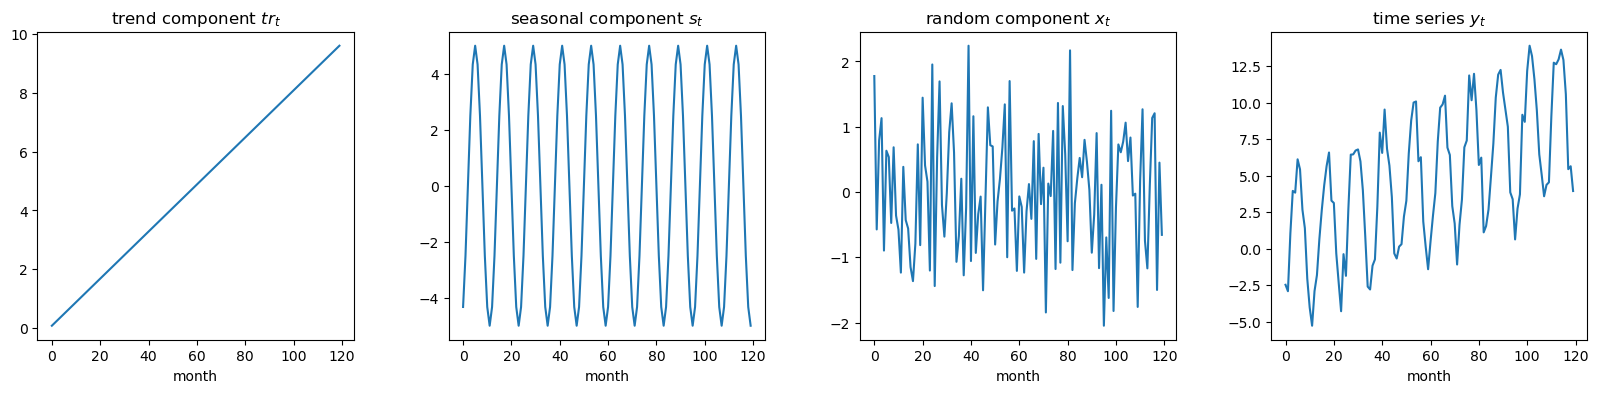

In [30]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=4,
    figsize=(20, 4),
    gridspec_kw={"hspace": 0.3, "wspace": 0.3},
)

tr_t.plot(ax=axes[0])
axes[0].set_title("trend component $tr_t$")
axes[0].set_xlabel("month")

s_t.plot(ax=axes[1])
axes[1].set_title("seasonal component $s_t$")
axes[1].set_xlabel("month")

x_t.plot(ax=axes[2])
axes[2].set_title("random component $x_t$")
axes[2].set_xlabel("month")

y_t.plot(ax=axes[3])
axes[3].set_title("time series $y_t$")
axes[3].set_xlabel("month")

plt.show()


The plot on the right end shows time series data with trend, seasonal, and random components.

In the rest of this unit, we explore some python functions for generating and decomposing time series data.

### Python functions for generating the predictable components
Since there is no randomness in the predictable components of time series data, they are also called the deterministic components. We can generate the deterministic components using the DeterministicProcess function from the time series analysis of the statsmodels module in Python. It can produce the level, time trends, and either seasonal dummies or cycles. In the following, we generate a deterministic process with a constant, a trend, and a 3-period seasonal term.

In [31]:
from statsmodels.tsa.deterministic import DeterministicProcess

#  create the time index
index = pd.period_range("2021-01-01", freq="M", periods=12)

# create the deterministic components
det_components = DeterministicProcess(
    index, constant=True, order=1, seasonal=True, period=3, fourier=0
)
det_components.in_sample()

const  trend  s(2,3)  s(3,3)
2021-01    1.0    1.0     0.0     0.0
2021-02    1.0    2.0     1.0     0.0
2021-03    1.0    3.0     0.0     1.0
2021-04    1.0    4.0     0.0     0.0
2021-05    1.0    5.0     1.0     0.0
2021-06    1.0    6.0     0.0     1.0
2021-07    1.0    7.0     0.0     0.0
2021-08    1.0    8.0     1.0     0.0
2021-09    1.0    9.0     0.0     1.0
2021-10    1.0   10.0     0.0     0.0
2021-11    1.0   11.0     1.0     0.0
2021-12    1.0   12.0     0.0     1.0

Note that the constant=True initiates the constant term, and by order=1 a linear time trend is added. We can change the order to higher numbers to have polynomial time trends. The seasonal terms appear in the data by the dummies and one can include sine and cosine cycles by setting an integer order for the fourier parameter. In the following, we show how to visualize the deterministic terms by defining a set of coefficients in param. In particular, we set the level to be 25, the time trend to be multiplied by 0.5 and leave the coefficients for the dummies to be 1. Changing these parameters can significantly change the pattern in the data.

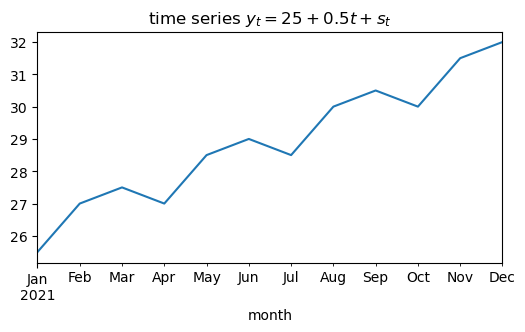

In [32]:
# convert the components to numpy arrays
det_terms = det_components.in_sample().to_numpy()

# create parameters
params = np.array([25, 0.5, 1, 1])

# create the time series y
y = pd.Series(det_terms.dot(params), index=index)

# plot y
y.plot(figsize=(6, 3))
plt.title("time series $y_{t}=25+0.5t+s_{t}$")
plt.xlabel("month")
plt.show()

The plot shows an upward trend with a seasonal component. One can also add the random term to the deterministic terms



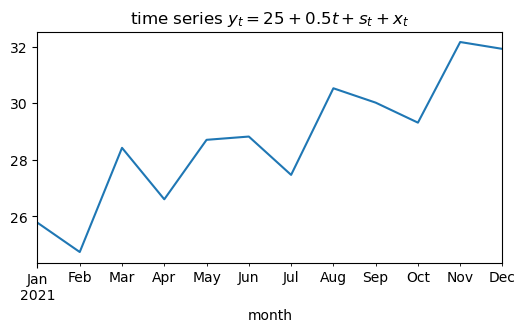

In [33]:
# create the random noise x
x = np.random.normal(size=12)

# create the time series y
y = pd.Series(det_terms.dot(params) + x, index=index)

# plot y
y.plot(figsize=(6, 3))
plt.title("time series $y_{t}=25+0.5t+s_{t}+x_{t}$")
plt.xlabel("month")
plt.show()

It is also possible to add lagged values and allow the sample to be partly driven by the past values:

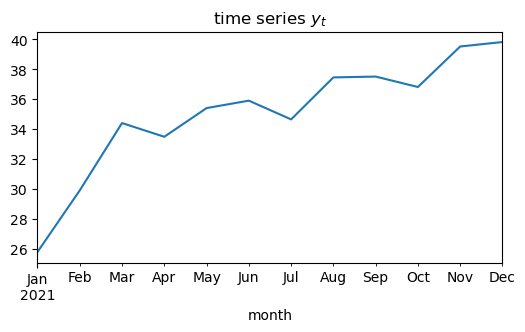

In [34]:
# initialize the process
y = np.empty(12)
y[0] = det_terms[0].dot(params) + x[0]

# create the time series y
for t in range(1, 12):
    y[t] = 0.2 * y[t - 1] + det_terms[t].dot(params) + x[t]
y = pd.Series(y, index=index)


# plot y
y.plot(figsize=(6, 3))
plt.title("time series $y_{t}$")
plt.xlabel("month")
plt.show()

This plot depicts the time series 
y
t
=
0.2
y
t
−
1
+
25
+
0.5
t
+
s
t
+
x
t
 where lagged term 
y
t
−
1
 with the coefficient 0.2 contributes to the dynamic of the process along with the time trend 
0.5
t
, seasonal terms 
s
t
 and the random noise 
x
t
.

*Note :* 
In time series analysis, we assume that the non-random components can be represented by deterministic functions of time that are not influenced by the random component. On the other hand, the random component does not contain any systematic movements and is considered as residuals. That is why in our simulations, we generated the residuals as a series of independent or uncorrelated random variables with mean zero and constant variance.
### Python functions for the decomposition of time series data
Note that we observe time series data as a whole in real life rather than by their individual components. However, some methods have been developed to decompose time series data to understand the underlying structure of data. This will help us to make informed decisions during modeling.

In the following, we use STL function (Seasonal-Trend decomposition using LOESS) to split the temperature data into the trend, seasonal, and residual components. The data contains the monthly temperature averages from 1864 to 2020, and are available from the Bern/Zollikofen station of the Swiss national basic climatological network.

Let’s download the data from the resources tab and import it as a dataframe.

In [37]:
# load the data
data = pd.read_csv("Ressources/c2_homog_mo_BER.txt", skiprows=27, sep="\s+")

# create time index
data["Date"] = data["Year"].astype("str") + "-" + data["Month"].astype("str")
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)
data.index.name = "Date"

# check a few rows of data
data.head()

Year  Month  Temperature  Precipitation
Date                                               
1864-01-01  1864      1         -7.6           22.5
1864-02-01  1864      2         -1.8           26.5
1864-03-01  1864      3          3.9           57.1
1864-04-01  1864      4          6.5           55.1
1864-05-01  1864      5         11.9           68.5

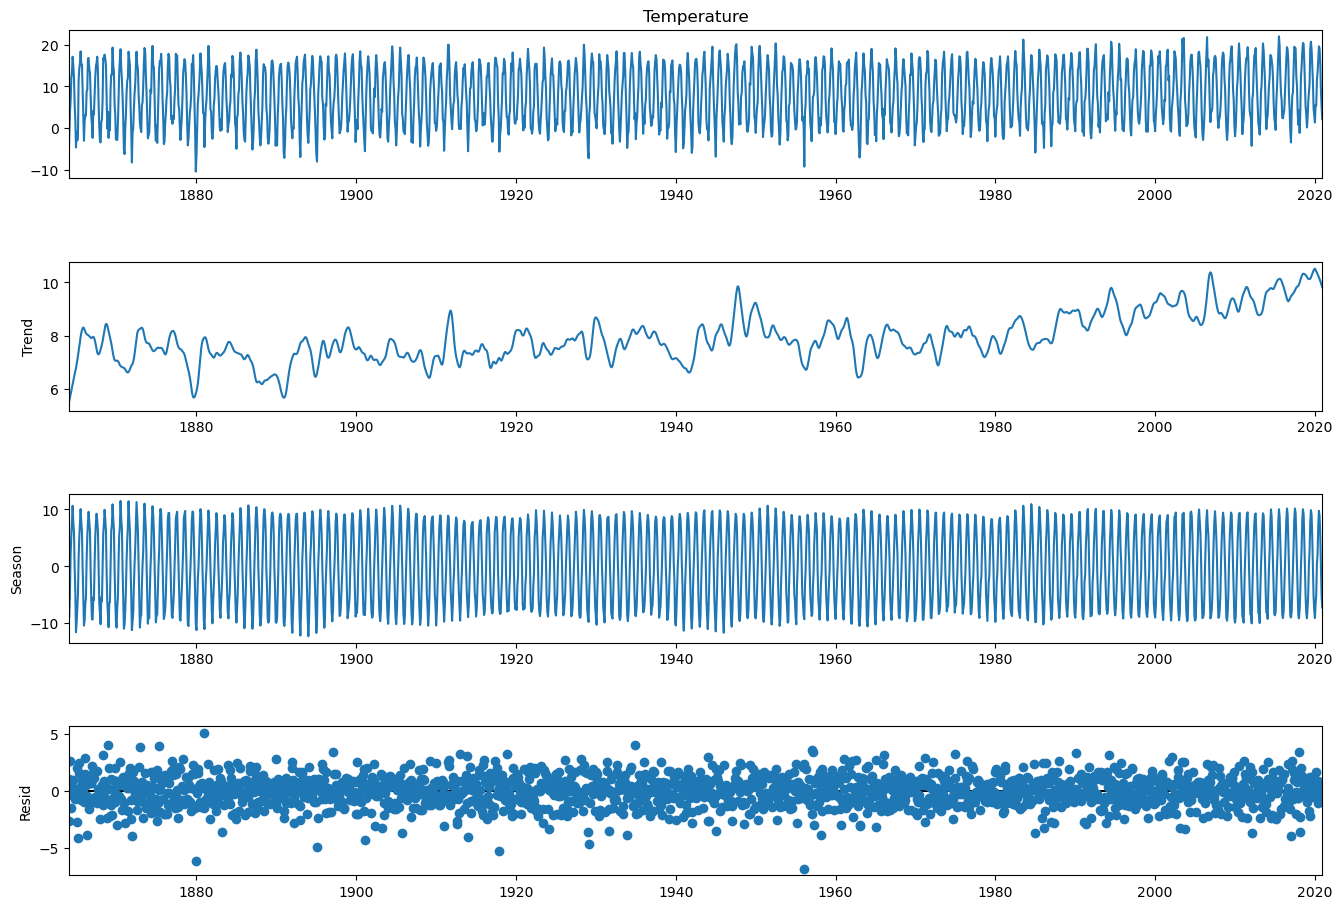

In [38]:
from statsmodels.tsa.seasonal import STL

# decomposition
res = STL(data["Temperature"]).fit()
fig = res.plot()

fig.set_size_inches(15, 10)
plt.show()

The data in the top panel are monthly temperature averages and the three subsequent plots show the three components, that when added together they reconstruct the data shown in the top panel. The decomposition reveals that there is an upward trend only in the last few decades (second panel), whereas the seasonality is present all over the period (third panel). The plot in the last row represents the remaining variations in the data that don’t come from the trend and seasonal components. That is why they are called residuals.

*Tips and Tricks :* 
Sometimes we are only interested in studying the trends in a time series data. In this cases, we can seasonally adjust the data by removing the seasonal component which amounts to simply subtracting the seasonal component from the original data.

### Summary
Let’s summarize what we’ve learned in this unit. Here are a few takeaways.

- In this unit we showed how the trends, cycles and random components contribute to the dynamics of time series data using simulated data.
- We also used how to decompose temperature data using the statsmodels module in Python.
- The analysis of time series data entails studying the trends and cycles.

## 11. Detecting autocorrelation in data
### This unit is optional
In this unit, we continue exploring the temporal dependency in time series data, not only through visualization but also by computing the autocorrelation in the data. We also discuss how to statistically test the significance of the autocorrelation.

We calculate the autocorrelation using the Pandas autocorr function that calculates the Pearson correlation between the time series and its shifted self by 
n
-lags in the past. The default value for the number of lags is one i.e. 
n
=
1
. One can also visualize the autocorrelation for many lags in the past using the Pandas autocorrelation_plot function from the pandas.plotting module. This plot also includes the 95% and 99% confidence bands for the autocorrelation.

*Note:*
We will discuss the statistical concepts of correlation, confidence bands (or intervals), and hypothesis testing later in this course under the statistical data analysis subject. However, following the content of this and the next unit requires only a minimal knowledge of these concepts.

### Autocorrelation in simulated time series data
In the following, we generate a simulated time series from a normal distribution. The data simply represents random noises over 100 time periods. Since the values are generated independently, we don’t expect to find a significant autocorrelation for any number of lags. Let’s check this using the autocorr and autocorrelation_plot functions.

In [39]:
from pandas.plotting import autocorrelation_plot, lag_plot

# generate the random component
x_t = pd.Series(np.random.normal(size=100))

level = 25

# time series y_t
y_t = level + x_t

In [40]:
# set the number of lag to be 1
n = 1

# calculate the autocorrelation for the 1st lag
print("autocorr with the 1st lag: {:.3f}".format(y_t.autocorr(n)))

# this is equivalent to
print("correlation with the 1st lag: {:.3f}".format(y_t.corr(y_t.shift(n))))

# and also to
print("correlation with the 1st lead: {:.3f}".format(y_t.corr(y_t.shift(-n))))

autocorr with the 1st lag: 0.085
correlation with the 1st lag: 0.085
correlation with the 1st lead: 0.085


Note that the above results show that the correlation of the current values, i.e. values at time 
t
, with the values from the previous period, 
ρ
(
y
t
,
y
t
−
1
)
, is the same as the correlation of the current values with the next period’s values, 
ρ
(
y
t
+
1
,
y
t
)
.

Let’s plot the data and the autocorrelations.

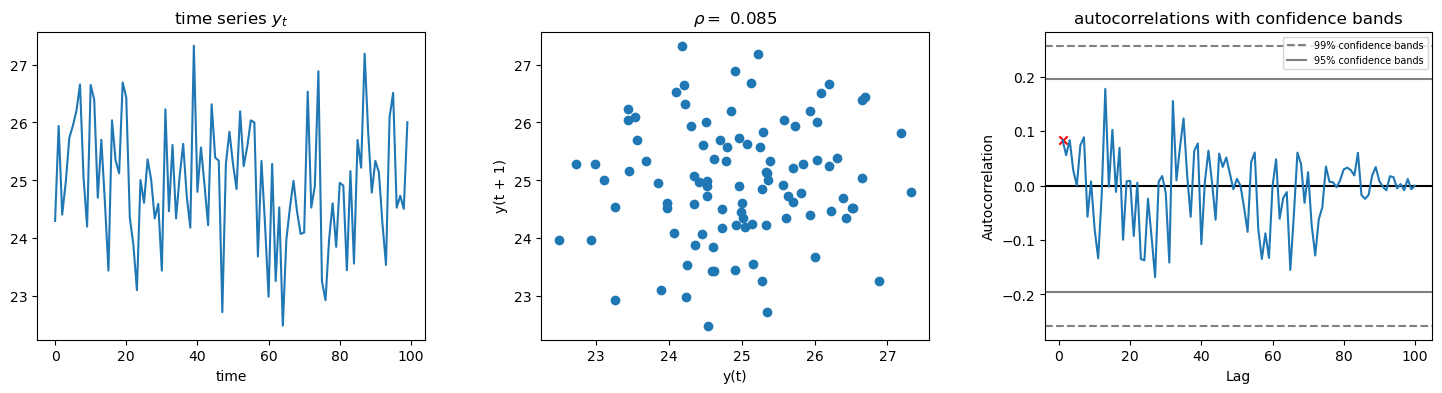

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4), gridspec_kw={"wspace": 0.3})

# the 1st plot on the left: plot y_t
y_t.plot(ax=axes[0])
axes[0].set_title("time series $y_{t}$")
axes[0].set_xlabel("time")

# the middle plot: scatter plot of y_t against its 1st lag
lag_plot(y_t, ax=axes[1])
axes[1].set_title(r"$\rho = $ {:.3f}".format(y_t.autocorr(1)))

# the 1st plot on the right: autocorrelations up to 100 lags
autocorrelation_plot(y_t, ax=axes[2])
axes[2].set_title("autocorrelations with confidence bands")
axes[2].legend(["99% confidence bands", "95% confidence bands"], fontsize="x-small")
axes[2].grid()

# let's put a red cross on the 1st autocorrelation value
axes[2].scatter(1, y_t.autocorr(1), marker="x", c="red")

plt.show()

The plot on the left shows that the values randomly change around 25, i.e., the level. The middle plot shows the scatter plot between the values of two consecutive periods. Finally, in the third plot, the 95% and 99% confidence bands around zero ensure that the autocorrelations are not statistically different from zero as they are all within the bands. Note that since the horizontal line at zero is within the bands, the autocorrelations which fall within the bands should be considered as zero. The value with a red cross shows the autocorrelation for the first lag i.e. an estimate for 
ρ
(
y
t
,
y
t
−
1
)
 that is -0.036.

Alternatively, one can use the plot_acf function from the statsmodels module.

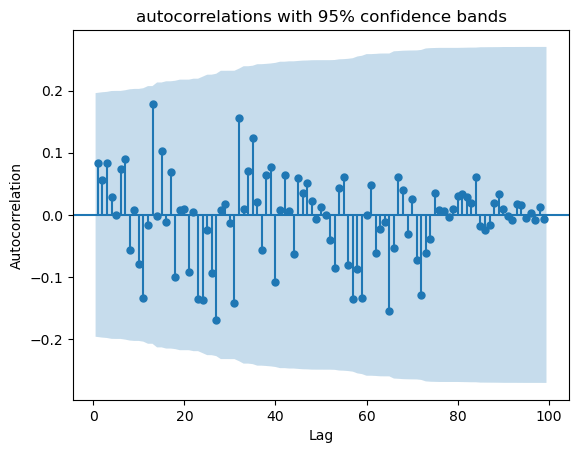

In [42]:
# load the module
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(y_t, lags=99, alpha=0.05, zero=False)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("autocorrelations with 95% confidence bands")
plt.show()

This autocorrelation plot is very similar to the one we obtained using the autocorrelation_plot function. Note that we set zero=False to avoid including the 
ρ
(
y
t
,
y
t
)
 in the plot (which is essentially equal to 1). We can also define confidence bands using the parameter alpha. The value 0.05 results in the 95% confidence bands. However, as the plot shows, the bands are not constant across lags. This is because a different formula is used to calculate the bands. In fact, the estimator for the variance of autocorrelations is an increasing function of lags.

*Note :*
In the context of time series analysis, the acronym ACF is often used for the autocorrelation function. The autocorrelation plot may also be referred to as a correlogram.

### Adding time dependency in the simulated data and varying it from 1 to 0.1
In the following, we generate another series that has time dependencies and then check the ACFs. At each time step, the time series value is equal to the value from the previous period plus random noise. Therefore, we expect to observe large autocorrelations.


In [43]:
# initialize the values with zero
y_t = np.zeros(100)

# generate the time series, x_t is the random component from the previous example
for i in range(1, 100):
    y_t[i] = y_t[i - 1] + x_t[i]

y_t = pd.Series(y_t)

Let’s visualize 
y
t
.

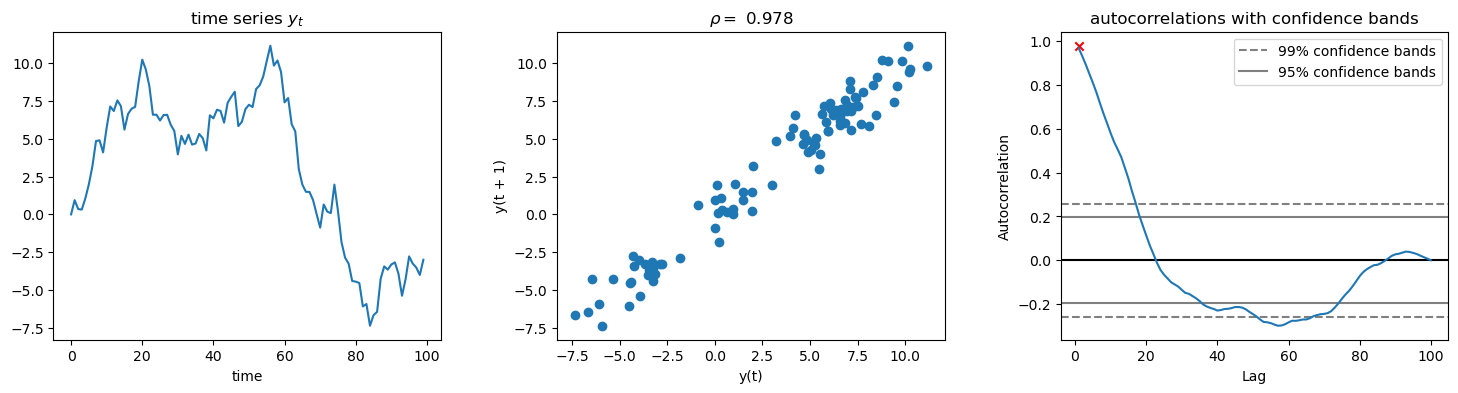

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4), gridspec_kw={"wspace": 0.3})

y_t.plot(ax=axes[0])
axes[0].set_title("time series $y_{t}$")
axes[0].set_xlabel("time")

lag_plot(y_t, ax=axes[1])
axes[1].set_title(r"$\rho = $ {:.3f}".format(y_t.autocorr(1)))

autocorrelation_plot(y_t, ax=axes[2])
axes[2].set_title("autocorrelations with confidence bands")
axes[2].grid()
axes[2].scatter(1, y_t.autocorr(1), marker="x", c="red")
axes[2].legend(["99% confidence bands", "95% confidence bands"])

plt.show()

The autocorrelation plot with confidence bands shows that most of the autocorrelations are significantly different from zero because they exceed the confidence bands. In particular, for the first few lags, there are strong time dependencies.

Let’s decrease the strength of temporal dependency by generating a time series where at each time step, the time series value is equal to half the value from the previous period plus random noise. We expect to observe smaller autocorrelations.

In [45]:
y_t = np.zeros(100)

# generate the time series, x_t is the random component from the previous example
for i in range(1, 100):
    y_t[i] = 0.5 * y_t[i - 1] + x_t[i]

y_t = pd.Series(y_t)

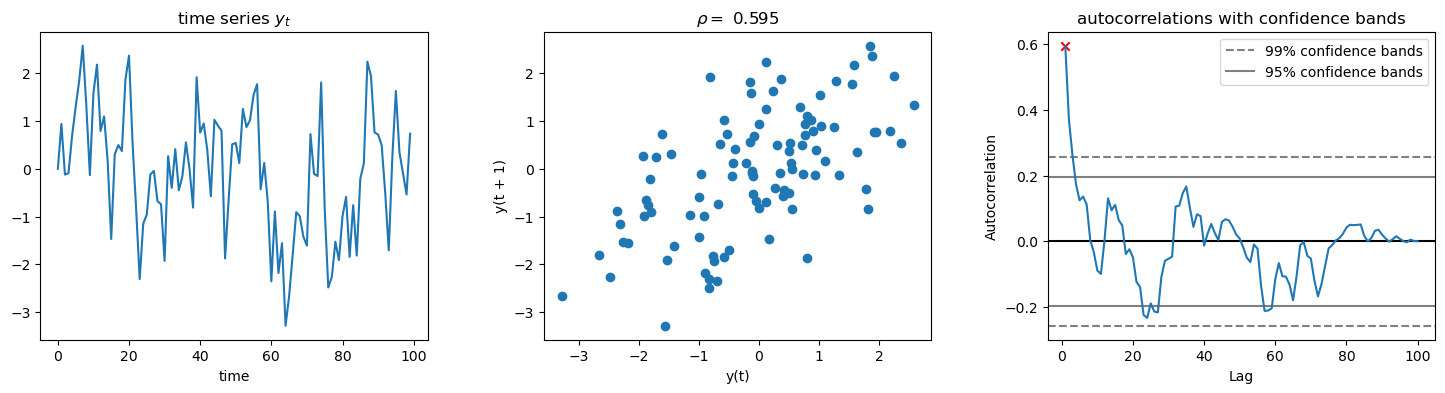

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4), gridspec_kw={"wspace": 0.3})

y_t.plot(ax=axes[0])
axes[0].set_title("time series $y_{t}$")
axes[0].set_xlabel("time")

lag_plot(y_t, ax=axes[1])
axes[1].set_title(r"$\rho = $ {:.3f}".format(y_t.autocorr(1)))

autocorrelation_plot(y_t, ax=axes[2])
axes[2].set_title("autocorrelations with confidence bands")
axes[2].grid()
axes[2].scatter(1, y_t.autocorr(1), marker="x", c="red")
axes[2].legend(["99% confidence bands", "95% confidence bands"])

plt.show()


The autocorrelations plot with confidence bands shows that the autocorrelation is significantly different from zero only for the first lag.

Let’s further decrease the strength of dependency by generating a time series where at each time step, the time series value is equal to 0.1 of the value from the previous period plus random noise. We expect to observe even smaller and maybe insignificant autocorrelations.

In [47]:
y_t = np.zeros(100)

# generate the time series, x_t is the random component from the previous example
for i in range(1, 100):
    y_t[i] = 0.1 * y_t[i - 1] + x_t[i]

y_t = pd.Series(y_t)

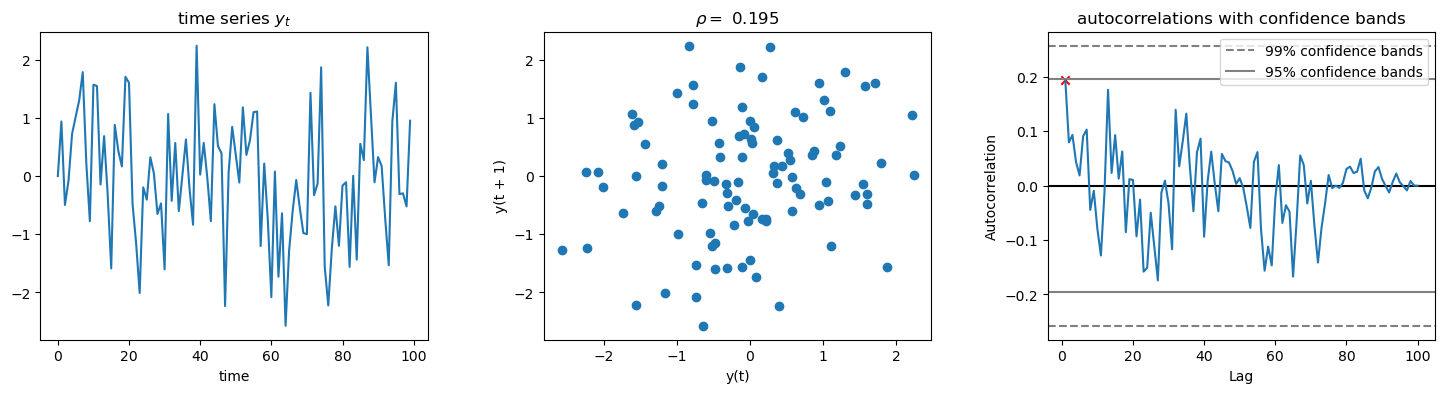

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4), gridspec_kw={"wspace": 0.3})

y_t.plot(ax=axes[0])
axes[0].set_title("time series $y_{t}$")
axes[0].set_xlabel("time")

lag_plot(y_t, ax=axes[1])
axes[1].set_title(r"$\rho = $ {:.3f}".format(y_t.autocorr(1)))

autocorrelation_plot(y_t, ax=axes[2])
axes[2].set_title("autocorrelations with confidence bands")
axes[2].grid()
axes[2].scatter(1, y_t.autocorr(1), marker="x", c="red")
axes[2].legend(["99% confidence bands", "95% confidence bands"])

plt.show()

As the autocorrelation plot shows, all the values are within the bands and insignificant; this time series resembles the random noise from the first example. In this case, there are temporal dependencies between consecutive values of the time series (through 
y
t
=
0.1
y
t
−
1
+
x
t
); however, the coefficient 0.1 is not strong enough to overcome the random component 
x
t
.

So far in this unit, we learned that it is essential to check the autocorrelation before starting to model time series data. The presence of autocorrelation in a time series indicates that we should include lags in our model to capture the time series dynamic. We also learned that confidence bands are one way to check if autocorrelations are significant or not. In the following, we briefly discuss how to test the significance of autocorrelations.

### Statistical test of autocorrelations
We can statistically test the significance of the autocorrelations up to a specified lag using the Ljung–Box Q test (LBQ). The null hypothesis of the LBQ test is that there is no autocorrelation up to a specified lag, or the data are independently distributed. The alternative hypothesis is that at least one of the autocorrelations is significantly different from zero.

This test can be seen as an alternative to the autocorrelation plot with confidence bands that we already explored. Except that here we can test if the autocorrelations are jointly insignificant. We can perform the test using the acorr_ljungbox function from the time series analysis of the statsmodels module. In the following, we apply this test to a simulated series.

In [49]:
y_t = np.zeros(100)

# generate the time series, x_t is the random component from the previous example
for i in range(1, 100):
    y_t[i] = 0.5 * y_t[i - 1] + x_t[i]

# testing the significance of autocorrelations for the first 2 lags
sm.stats.acorr_ljungbox(y_t, lags=[2], return_df=True)

lb_stat     lb_pvalue
2  50.726086  9.659852e-12

The p-value is way below the 0.05 significance level, which means that we can reject the null hypothesis in favor of the alternative that at least one of the two autocorrelations is not zero in population. This confirms our previous observation in the autocorrelation plot with confidence bands that the autocorrelation for the first lag is significantly different from zero.

*Tips and Tricks :*
In statistical hypothesis testing, we reject the null hypothesis if the p-value is less than significance level of 0.05.

This test statistic is also useful for testing if a fitted model has been successful in capturing the autocorrelation in a time series. For instance, if we fit a model (e.g. 
y
t
=
α
y
t
−
1
+
x
t
) on the time series 
y
t
 that correctly captures the relation between 
y
t
 and 
y
t
−
1
, then we expect to see no autocorrelation left in the residuals. We can test the presence of autocorrelation in the estimated residuals 
x
t
 using the acorr_ljungbox function.

### Autocorrelation in real data
So far in this unit, we used synthetic data to calculate and test autocorrelations. Let’s calculate and test autocorrelations for the 1st lag for some of the data sets that we used in the previous units i.e. the unemployment rates, GDP, stock prices, temperatures and finally random noises.

Let’s start by loading the data.

In [50]:
# load unemployment rates
unemp = pd.read_csv("Ressources/c2_LMUNRRTTCHQ156S.csv", index_col="DATE")
unemp.index = pd.to_datetime(unemp.index, format="%Y-%m-%d")

# load GDP data
gdp = pd.read_csv("Ressources/c2_CPMNACSAB1GQCH.csv", index_col="DATE")
gdp.index = pd.to_datetime(gdp.index, format="%Y-%m-%d")

# load stock prices
data = pd.read_csv("Ressources/c2_financial_data.csv", index_col="Date")
data.index = pd.to_datetime(data.index, format="%d.%m.%y")
prices = data["Close"]

# load temperature data
temp = pd.read_csv(
    "Ressources/c2_daily-min-temperatures.txt", parse_dates=["Date"], index_col="Date"
)

# generate random noise
np.random.seed(5)
noise = pd.DataFrame(
    np.random.normal(size=240),
    columns=["noise"],
    index=pd.date_range("2001-jan", periods=240, freq="M"),
)

Let’s plot the data and the autocorrelations

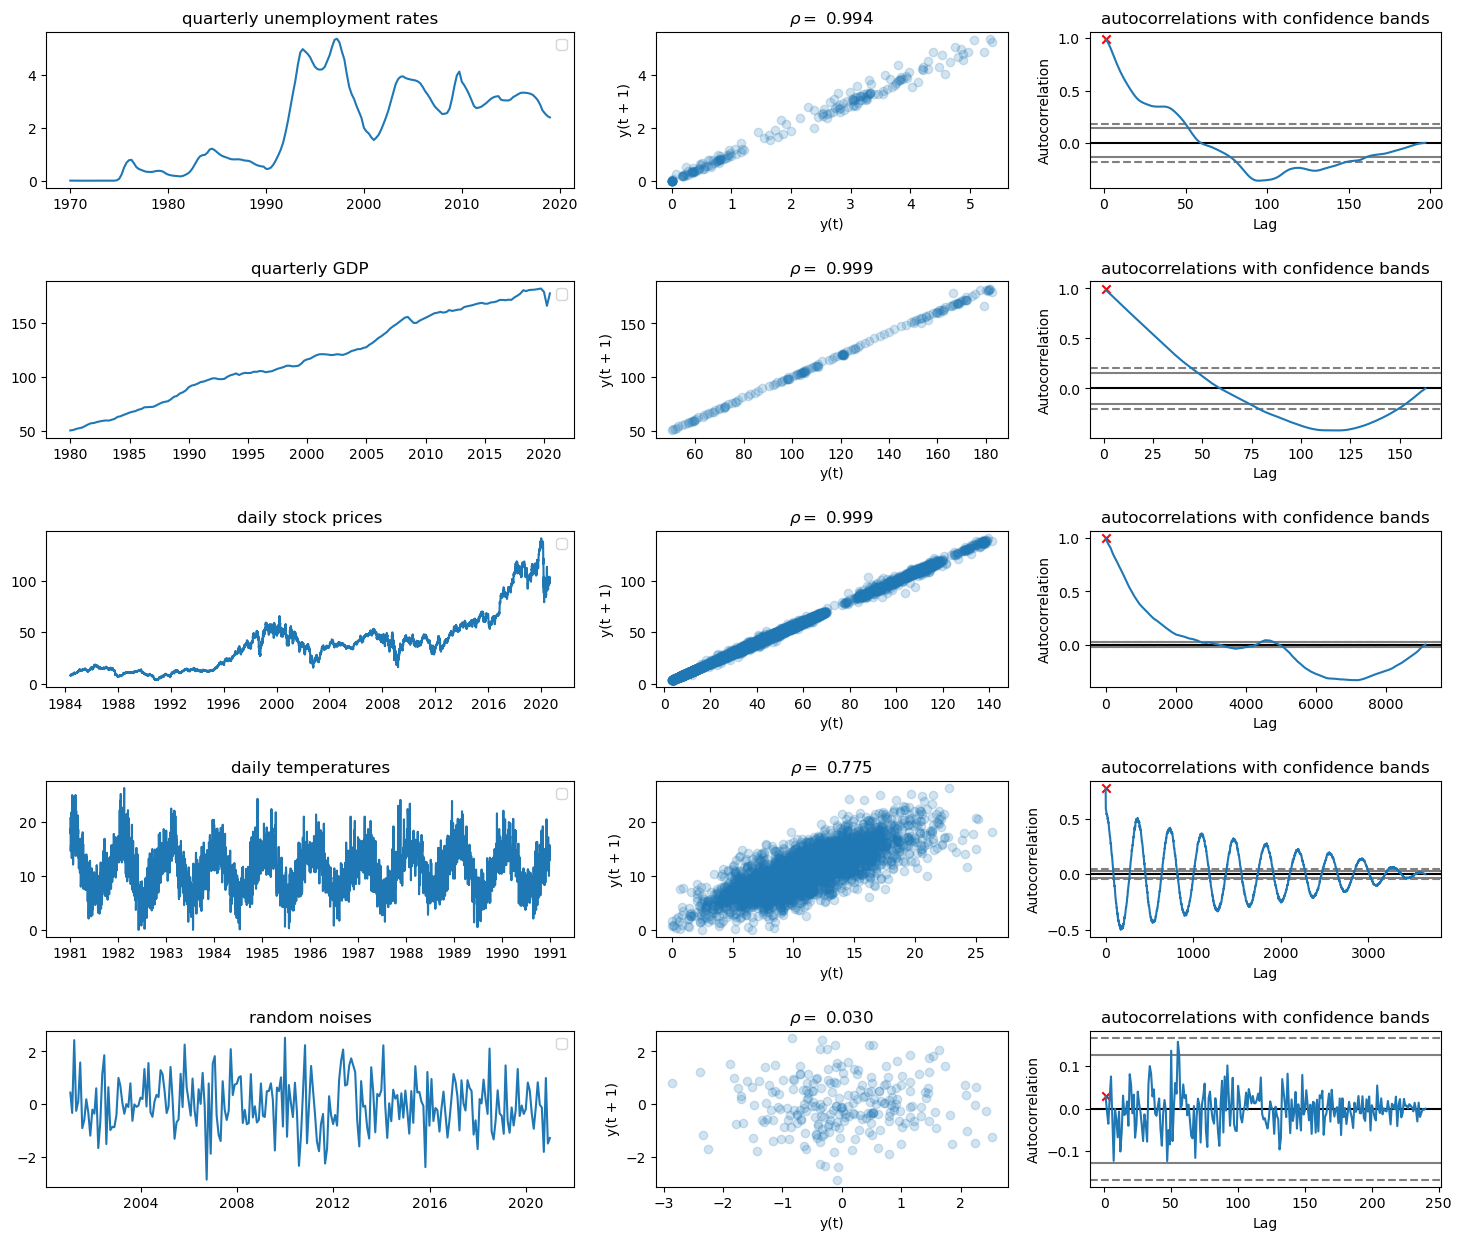

In [51]:
fig, axes = plt.subplots(
    nrows=5,
    ncols=3,
    figsize=(18, 15),
    gridspec_kw={"hspace": 0.6, "wspace": 0.2, "width_ratios": [1.5, 1, 1]},
)

# 1st column of plots on the left: plot the data
axes[0, 0].plot(unemp)
axes[1, 0].plot(0.001 * gdp)
axes[2, 0].plot(prices)
axes[3, 0].plot(temp)
axes[4, 0].plot(noise)

#  define the titles
titles = [
    "quarterly unemployment rates",
    "quarterly GDP",
    "daily stock prices",
    "daily temperatures",
    "random noises",
]

#  add labels and titles
for (ax, t) in zip(axes[:, 0].flatten(), titles):
    ax.legend("")
    ax.set_xlabel("")
    ax.set_title(str(t))

# middle column: scatter plots of the values with their first lags
lag_plot(unemp, lag=1, ax=axes[0, 1], alpha=0.2)
lag_plot(0.001 * gdp, lag=1, ax=axes[1, 1], alpha=0.2)
lag_plot(prices, lag=1, ax=axes[2, 1], alpha=0.2)
lag_plot(temp, lag=1, ax=axes[3, 1], alpha=0.2)
lag_plot(noise, lag=1, ax=axes[4, 1], alpha=0.2)

# squeeze dataframes to series and set the titles for lag_plots in the middle column
axes[0, 1].set_title(r"$\rho = $ {:.3f}".format(unemp.squeeze().autocorr(1)))
axes[1, 1].set_title(r"$\rho = $ {:.3f}".format(gdp.squeeze().autocorr(1)))
axes[2, 1].set_title(r"$\rho = $ {:.3f}".format(prices.squeeze().autocorr(1)))
axes[3, 1].set_title(r"$\rho = $ {:.3f}".format(temp.squeeze().autocorr(1)))
axes[4, 1].set_title(r"$\rho = $ {:.3f}".format(noise.squeeze().autocorr(1)))

# 1st column of plots on the right: plot autocorrelations
autocorrelation_plot(unemp, ax=axes[0, 2])
autocorrelation_plot(gdp, ax=axes[1, 2])
autocorrelation_plot(prices, ax=axes[2, 2])
autocorrelation_plot(temp, ax=axes[3, 2])
autocorrelation_plot(noise, ax=axes[4, 2])

# add titles
for ax in axes[:, 2].flatten():
    ax.grid()
    ax.set_title("autocorrelations with confidence bands")

# add the red cross on the 1st lag
axes[0, 2].scatter(1, unemp.squeeze().autocorr(1), marker="x", c="red")
axes[1, 2].scatter(1, gdp.squeeze().autocorr(1), marker="x", c="red")
axes[2, 2].scatter(1, prices.squeeze().autocorr(1), marker="x", c="red")
axes[3, 2].scatter(1, temp.squeeze().autocorr(1), marker="x", c="red")
axes[4, 2].scatter(1, noise.squeeze().autocorr(1), marker="x", c="red")

plt.show()

We have already seen the plots in the first column in the previous units. In the second column, we used lag_plot only for the first lag, and as for the title we print the autocorrelation value i.e. 
ρ
(
y
t
,
y
t
−
1
)
. The third column shows the autocorrelations with confidence bands across all lags, and only the first lag is flagged with a red cross. As expected, the autocorrelation for the first lag is insignificant for the random noise only.

As an alternative to the confidence bands, we can also test the significance of the autocorrelations for the first lags using the Ljung-Box test statistics as described before.

In [52]:
# Ljung-Box test of autocorrelations for the first lags
test = []
test.append(sm.stats.acorr_ljungbox(unemp, lags=[1], return_df=False))
test.append(sm.stats.acorr_ljungbox(gdp, lags=[1], return_df=False))
test.append(sm.stats.acorr_ljungbox(prices, lags=[1], return_df=False))
test.append(sm.stats.acorr_ljungbox(temp, lags=[1], return_df=False))
test.append(sm.stats.acorr_ljungbox(noise, lags=[1], return_df=False))

pd.DataFrame(
    test,
    columns=["LB test statistic", "p-value"],
    index=["unemp", "gdp", "prices", "temp", "noise"],
    dtype=np.float,
).round(2)

LB test statistic  p-value
unemp              195.92     0.00
gdp                160.30     0.00
prices            9122.68     0.00
temp              2189.94     0.00
noise                0.21     0.64

### Summary
Let’s summarize what we’ve learned in this unit. Here are the main takeaways:

- We showed how to compute and visualize the autocorrelations for simulated and real time series data.
- We showed how to decide about the significance of the autocorrelations using the confidence bands and statistically test.
- Analysis of time series data entails studying the autocorrelations, which helps deciding about the number of lags in a model.

## 12. Detecting and removing non-stationarity

In this unit, we continue exploring stationarity in time series data by learning how to detect it and convert non-stationary data to stationary data. The general idea is to make sure the time series data are stationarity before modeling. It means that we should make sure that the statistical properties of a time series, i.e., mean, variance, and covariance, do not vary too much over time. This will help some statistical models to result in more accurate predictions. Remember that we visually showed that stock price data are not stationary. In the following, we use two methods to test if the prices are stationary or not statistically.

### Statistical test of non-stationarity
One popular test for this purpose is the Augmented Dickey-Fuller (ADF) test. The null hypothesis is that the data has a unit root (i.e. the data is non-stationary), and if we fail to reject the null hypothesis, this test may provide evidence that the series is non-stationary.

Let’s load the price data again and test them.

In [53]:
# load the data
data = pd.read_csv("Ressources/c2_financial_data.csv", index_col="Date")
data.index = pd.to_datetime(data.index, format="%d.%m.%y")

prices = data["Close"]

Let’s import the adfuller function from the time series analysis of the statsmodels module and do the test.

In [56]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(prices)
print("p-value is %.2f" % adf_test[1])

p-value is 0.84


Since the p-value is greater than the significance level of 0.05, we cannot reject the null hypothesis, and therefore conclude that the price series is non-stationary.

*Tips and Tricks:*
In statistical hypothesis testing, we reject the null hypothesis if the p-value is less than significance level of 0.05.

However, a time series can be trend-stationary while it is non-stationary. The time series analysis of statsmodels module in Python offers another function called kpss for checking the stationarity of a time series. However, the null hypothesis for the KPSS test, in contrast to the ADF test, is that the data is stationary around a deterministic trend, i.e. trend-stationary. Let’s perform this test on the price data.

In [57]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(prices, regression="ct", nlags="auto")
print("p-value is %.2f" % kpss_test[1])

p-value is 0.01


C:\Users\s1114237\Anaconda3\envs\adsml\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Since the p-value is smaller than the significance level of 0.05, we reject the null hypothesis that the price series is trend-stationary, and therefore it is non-stationary as in the case of the ADF test.

Note that in the case of the KPSS test we should choose regression='ct' to test the trend-stationarity. We get the warning message because the test statistic is outside the table of critical values and therefore the p-value is outside the interval (0.01, 0.1). In such cases, the boundary p-value of 0.01 will be returned.

While using only the ADF test is enough, by applying both tests we can acquire more information about the data.

*Note:*
There are four possible outcomes after applying the two tests and below are the conclusions one can draw from the results:
- Case 1: Both tests conclude that the series is not stationary. Then the series is not stationary
- Case 2: Both tests conclude that the series is stationary. Then the series is stationary
- Case 3: KPSS indicates stationarity and ADF indicates non-stationarity. Then the series is trend stationary and should be detrended to become stationary.
- Case 4: KPSS indicates non-stationarity and ADF indicates stationarity. Then the series is difference stationary and should be differenced to become stationary.

### Removing non-stationarity
It is possible to remove the non-stationarity of a time series by differencing or removing the time trend. In differencing, we create a new series by taking the difference between every two consecutive observations using the Pandas diff(1) function. Then we can check the stationarity of the new series using the tests described above.

For some time series data, it is possible that the differencing has to be applied more than once to achieve the stationarity. In the following, we apply the differencing on the prices and plot them.



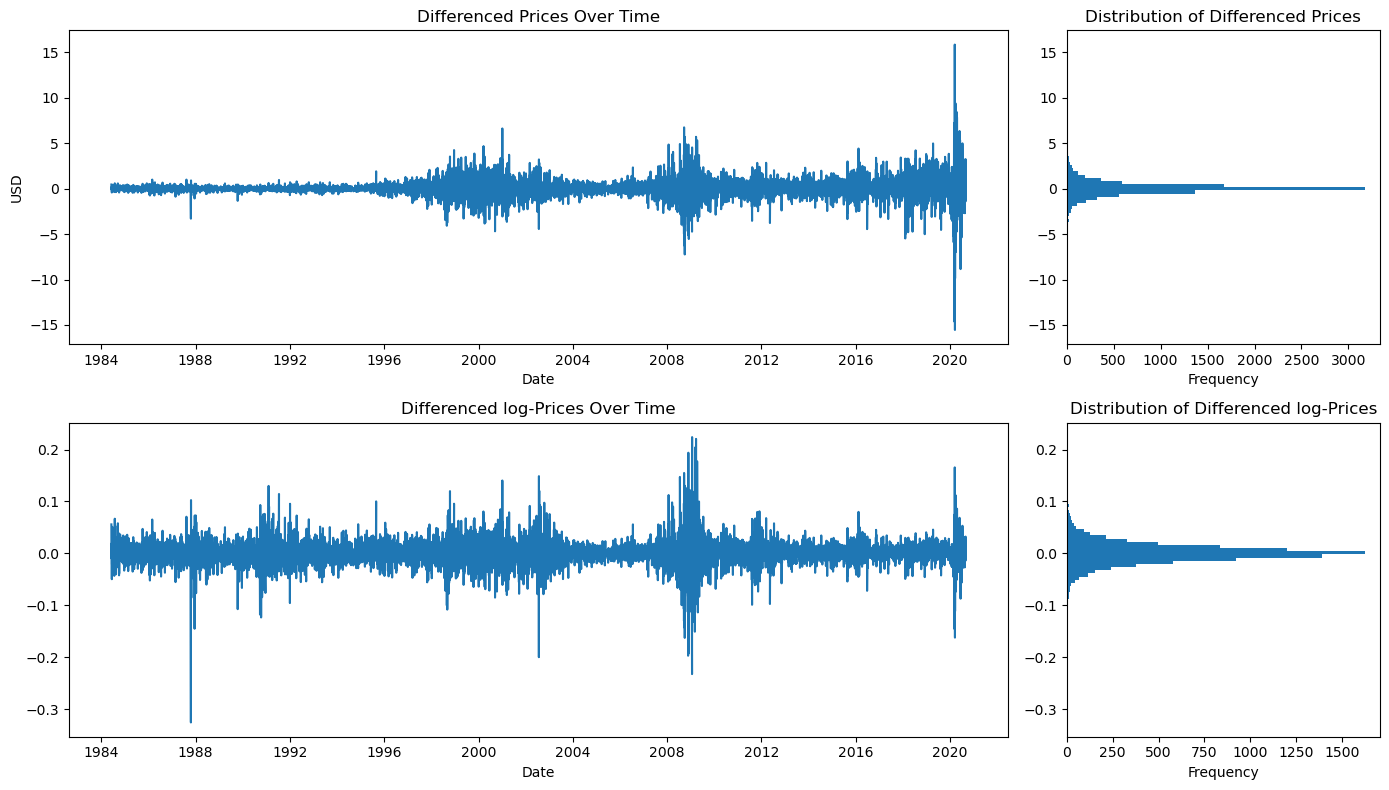

In [58]:
fig, ax = plt.subplots(2, 2, figsize=(14, 8), gridspec_kw={"width_ratios": [3, 1]})

# create the first plot for the prices over time
ax[0, 0].set_title("Differenced Prices Over Time")
ax[0, 0].set_xlabel("Date")
ax[0, 0].set_ylabel("USD")
ax[0, 0].plot(prices.diff(1).dropna())

# create the histogram of prices in the second plot
ax[0, 1].set_title("Distribution of Differenced Prices")
ax[0, 1].set_xlabel("Frequency")
ax[0, 1].hist(prices.diff(1).dropna(), bins=90, orientation="horizontal")

# create the first plot for the prices over time
ax[1, 0].set_title("Differenced log-Prices Over Time")
ax[1, 0].set_xlabel("Date")
ax[1, 0].set_ylabel("")
ax[1, 0].plot(np.log(prices).diff(1).dropna())

# create the histogram of prices in the second plot
ax[1, 1].set_title("Distribution of Differenced log-Prices")
ax[1, 1].set_xlabel("Frequency")
ax[1, 1].hist(np.log(prices).diff(1).dropna(), bins=90, orientation="horizontal")

fig.tight_layout()
plt.show()

Note that the differencing helped to stabilize the level of the prices around zero (plots in the first row), and may be enough to make the series stationary. However, the variance of the differenced data is not the same over time. The price changes are very smooth until 1996, but they vary a lot during some later periods namely the dot-com bubble 2000-2002, the great financial crisis of 2007-2008, and the market crash in early 2020. Other transformations such as logarithms can help to stabilize the variance. The plots at the bottom show the differenced log-prices. That is, prices are first log-transformed and then differenced. The variance now looks more homogeneous over time. Let’s test the stationarity of the new data.

In [59]:
adf_test = adfuller(np.log(prices).diff(1).dropna(), regression="nc")
print("ADF p-value is %.2f" % adf_test[1])

kpss_test = kpss(np.log(prices).diff(1).dropna(), regression="ct", nlags="auto")
print("KPSS p-value is %.2f" % kpss_test[1])


ADF p-value is 0.00
KPSS p-value is 0.10


C:\Users\s1114237\Anaconda3\envs\adsml\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Both tests indicate that the differenced log-price series is stationary. Note that by differencing the data loses one observation and that is why we used dropna().

### Non-stationarity and seasonality
Sometimes it is necessary to take a seasonal difference to remove non-stationarity of a time series. Let’s do this with the monthly gas consumption data. To start, download the data from the resources tab and import it as a dataframe.

In [62]:
# U.S. Natural Gas Total Consumption in billion cubic feet
data = pd.read_csv("Ressources/c2_gas_US.csv", index_col="Date")
data.index = pd.to_datetime(data.index, format="%b.%y")

data.head()

U.S. Natural Gas Total Consumption (Bcf)
Date                                                
2001-01-01                                  2676.998
2001-02-01                                  2309.464
2001-03-01                                  2246.633
2001-04-01                                  1807.170
2001-05-01                                  1522.382

Let’s perform the tests of non-stationarity for this data.

In [63]:
df_test = adfuller(data, regression="ct")
print("ADF p-value is %.2f" % adf_test[1])

kpss_test = kpss(data, regression="ct", nlags="auto")
print("KPSS p-value is %.2f" % kpss_test[1])

ADF p-value is 0.00
KPSS p-value is 0.10


C:\Users\s1114237\Anaconda3\envs\adsml\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


KPSS indicates stationarity and ADF indicates non-stationarity. Then the monthly gas consumption data is trend stationary which is also evident in the first panel of the following plot. Therefore, it should be detrended to become stationary.

To remove the non-stationarity, instead of differencing two consecutive values, we subtract each observation from an observation 12 months in the past because the patterns repeat every 12 months (e.g. the peaks happen at every January). The result is the plot of new series in the middle panel which looks stationary. We can further apply the first difference to this new series as shown in the bottom panel to make it even more stationary.

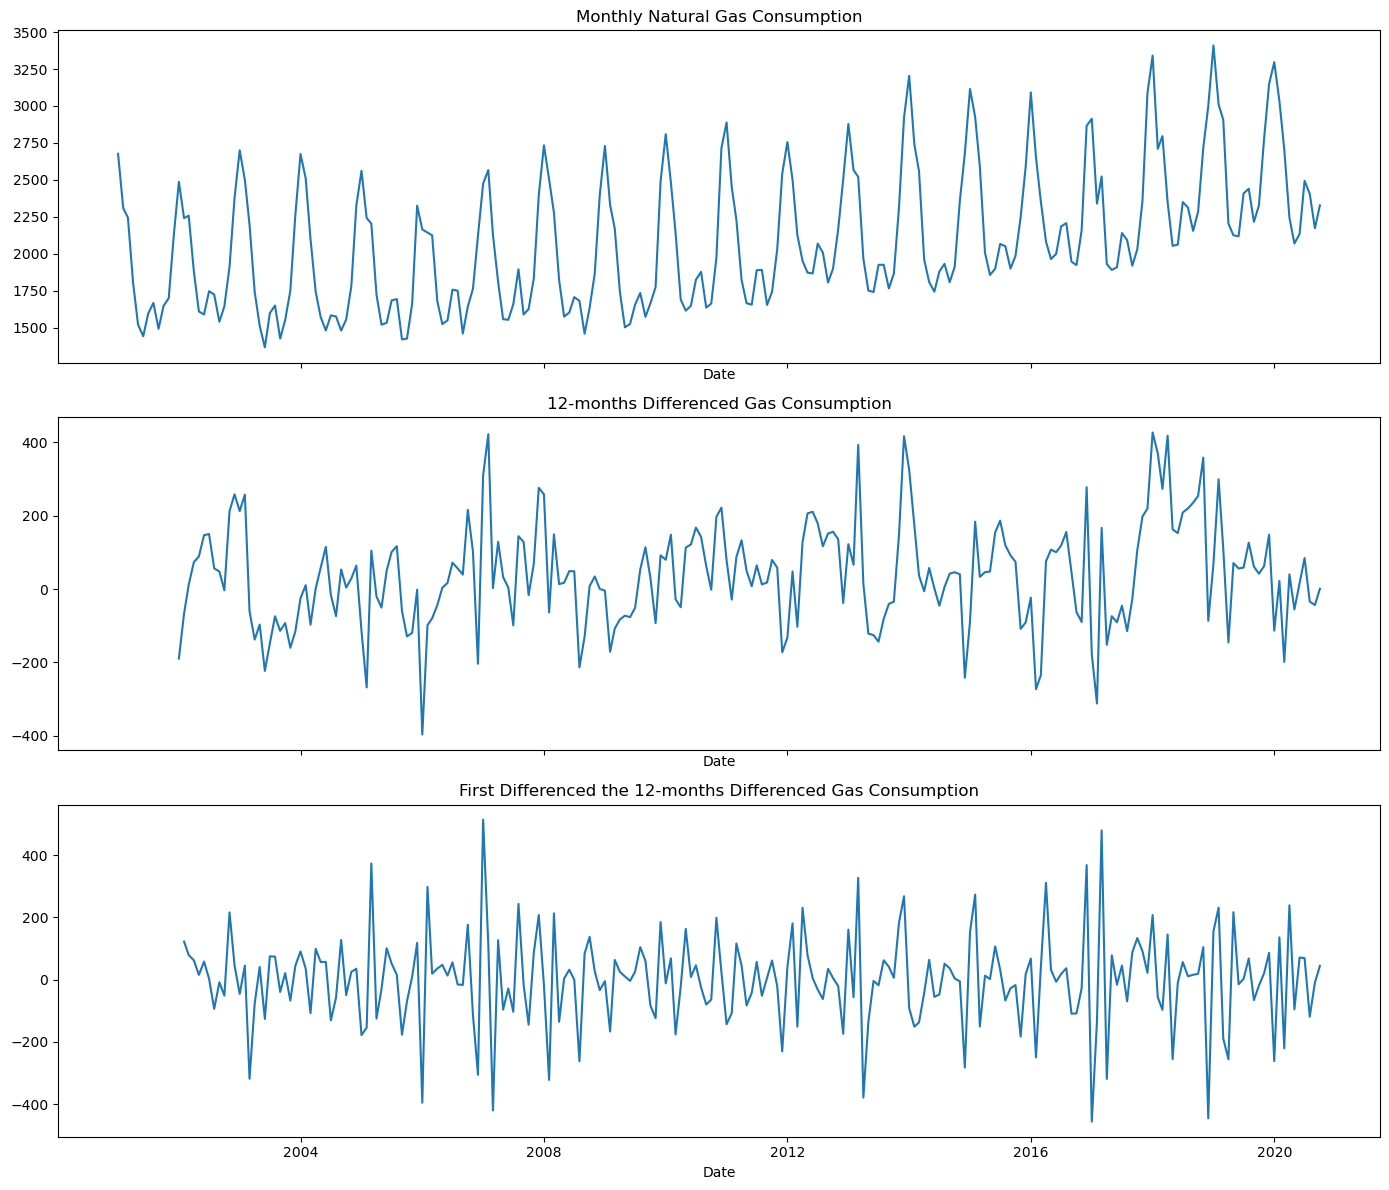

In [64]:
fig, ax = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# create the plot for original data
ax[0].set_title("Monthly Natural Gas Consumption")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("")
ax[0].plot(data)

# create the seasonally differenced plot
ax[1].set_title("12-months Differenced Gas Consumption")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("")
ax[1].plot(data.diff(12))

# create the first differenced plot
ax[2].set_title("First Differenced the 12-months Differenced Gas Consumption")
ax[2].set_xlabel("Date")
ax[2].set_ylabel("")
ax[2].plot(data.diff(12).diff(1))

fig.tight_layout()
plt.show()

In [65]:
adf_test = adfuller(data.diff(12).diff(1).dropna(), regression="nc")
print("ADF p-value is %.2f" % adf_test[1])

kpss_test = kpss(data.diff(12).diff(1).dropna(), regression="ct", nlags="auto")
print("KPSS p-value is %.2f" % kpss_test[1])

ADF p-value is 0.00
KPSS p-value is 0.10


C:\Users\s1114237\Anaconda3\envs\adsml\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Both tests indicate that the double differenced gas consumption data are stationary.

### Summary
Let’s summarize what we’ve learned in this unit. Here are the main takeaways:

- We showed how to test non-stationarity in time series data.
- We showed how to remove non-stationarity in time series data.
- Analysis of time series data entails studying the stationarity of the data.

## 13. Exercise : air passenger data
### Airline Passengers Data
In this exercise, you will use Airline Passengers dataset, which provides the monthly number of airline passengers from 1949 to 1960 for an airline company. This dataset is available on Kaggle. The objective is to apply the methods you learned in this subject to explore trends and cycles, autocorrelations and stationarity in the data.

From the Resource tab you can download the exercise notebook, the solution notebook as well as the AirPassengers.csv data.

├── c2_exercise_airpassengers.ipynb
├── c2_solution_airpassengers.ipynb
└── c2_AirPassengers.csv